### Import packages

In [87]:
# Import necessary packages
import requests
import csv
import pandas as pd

# Main Web Scraping Workflows

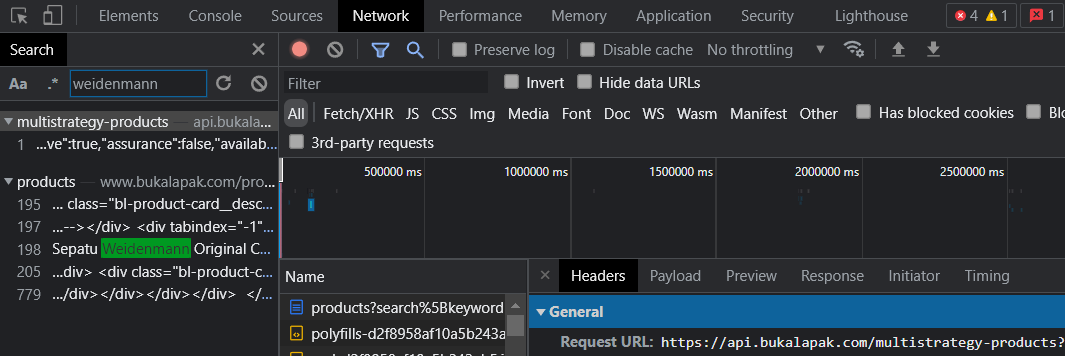

In [88]:
# 1. Make URL variable
url = 'https://api.bukalapak.com/multistrategy-products/'

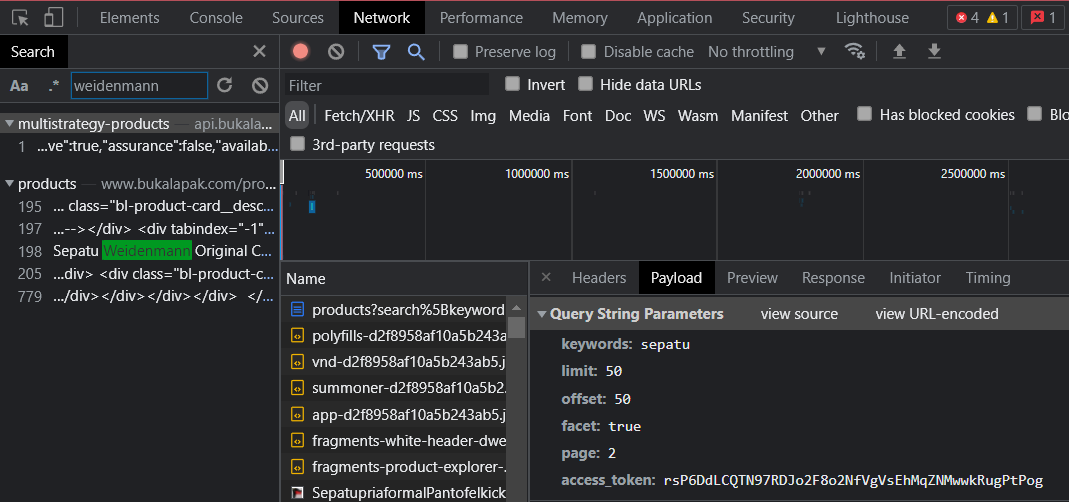

In [89]:
# 2. Make parameter variable
parameter = {
        'keywords': 'sepatu',
        'limit': 50,
        'offset': 50,
        'facet': True,
        'page': 2,
        'access_token': '28W5Vbti1bDZD3YnBET7PBrabSoXU6NKhOLbAr-dqn-XFg'
    }

In [90]:
# 3. Make response using .get() function
r = requests.get(url=url, params=parameter)

In [91]:
# 4. See response quality, if 200 it's all set up
r

<Response [200]>

In [92]:
# 5. Parse the json data
r = requests.get(url=url, params=parameter).json()

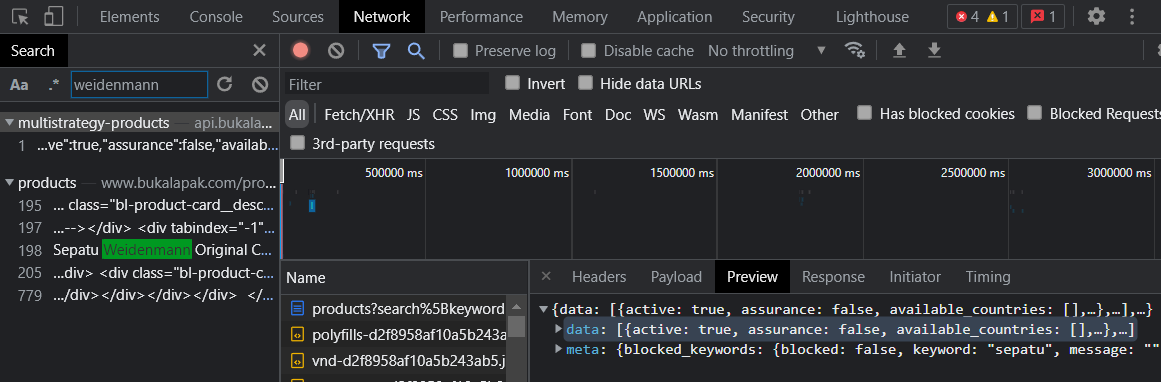

In [93]:
# 6. Access products at r['data']
products = r['data']

In [94]:
# 7. Loop over the products
category_total = []
nama_total = []
current_price_total = []
original_price_total = []
stock_total = []

for p in products:
    nama = p['name']
    category = p['category']['name']
    current_price = p['price']
    original_price =  p['original_price']
    stock = p['stock']
    
    stock_total.append(stock)
    current_price_total.append(current_price)
    original_price_total.append(original_price)
    category_total.append(category)
    nama_total.append(nama)

In [95]:
# 8. See the results
nama_total[:5]

['SEPATU KULIT BRADLEYS - SEPATU BOOTS CASUAL - SEPATU KERJA - SEPATU PRIA BRADLEYS FOSTER BLACK',
 'Sepatu pdl ninja hayabusa sepatu jatah tni separu masa kini tni polri satpam',
 'sepatu Touring',
 'Mandiens Sepatu Kulit Asli PDH 03.B FLat Hitam Doff',
 'Sepatu Gucci Rhyton Leater Sneaker Unisex ten percent  Guarantee Store']

In [96]:
# 9. Because all good, we can proceed to make a dataframe
df = pd.DataFrame(data={'name':nama_total,
                        'category':category_total,
                        'current_price':current_price_total,
                        'original_price':original_price_total,
                        'stock':stock_total})

In [97]:
# 10. Let's take a look the dataframe
df.head()

,name,category,current_price,original_price,stock
0,SEPATU KULIT BRADLEYS - SEPATU BOOTS CASUAL - ...,Boots,250000,260000,8
1,Sepatu pdl ninja hayabusa sepatu jatah tni sep...,Boots,180000,257200,98
2,sepatu Touring,Boots,139900,139900,20
3,Mandiens Sepatu Kulit Asli PDH 03.B FLat Hitam...,Formal,180000,257200,43
4,Sepatu Gucci Rhyton Leater Sneaker Unisex ten ...,Sneaker Pria,1485000,1544400,18


In [98]:
# 11. Import the dataframe into Excel
df.to_excel('sepatu_tokopedia_api.xlsx', index=False)

# Web Scraping on Bukalapak Website (API)

In [100]:
# Make URL variable
url = 'https://api.bukalapak.com/multistrategy-products/'

# Store the data
category_total = []
nama_total = []
current_price_total = []
original_price_total = []
stock_total = []

for i in range(1, 21):
    # Make parameter variable
    parameter = {
        'keywords': 'sepatu',
        'limit': 50,
        'offset': 50,
        'facet': True,
        'page': i,
        'access_token': '28W5Vbti1bDZD3YnBET7PBrabSoXU6NKhOLbAr-dqn-XFg'
    }

    # Make response using .get() function
    r = requests.get(url=url, params=parameter).json()
    response = requests.get(url=url, params=parameter)
    print(f'request: {response.status_code} for page: {i}')
    
    # Parse the product on json data (r['data'])
    products = r['data']

    for p in products:
        nama = p['name']
        category = p['category']['name']
        current_price = p['price']
        original_price =  p['original_price']
        stock = p['stock']

        stock_total.append(stock)
        current_price_total.append(current_price)
        original_price_total.append(original_price)
        category_total.append(category)
        nama_total.append(nama)

request: 200 for page: 1
request: 200 for page: 2
request: 200 for page: 3
request: 200 for page: 4
request: 200 for page: 5
request: 200 for page: 6
request: 200 for page: 7
request: 200 for page: 8
request: 200 for page: 9
request: 200 for page: 10
request: 200 for page: 11
request: 200 for page: 12
request: 200 for page: 13
request: 200 for page: 14
request: 200 for page: 15
request: 200 for page: 16
request: 200 for page: 17
request: 200 for page: 18
request: 200 for page: 19
request: 200 for page: 20


In [101]:
df = pd.DataFrame(data={'name':nama_total,
                        'category':category_total,
                        'current_price':current_price_total,
                        'original_price':original_price_total,
                        'stock':stock_total})

In [102]:
df.head()

,name,category,current_price,original_price,stock
0,Sepatu PDL Vigoroso,Boots,1000000,1040000,10
1,Mile Sepatu Kasual Sneakers Pria Roman Import ...,Sneaker Pria,120000,354800,102
2,Sepatu Boot Pria Combat Pdl Safety ujung Pla...,Boots,210000,308400,99
3,Sepatu Delta,Boots,148500,335940,49874
4,LEATHER CARE - AROMA COFFEE - PERAWATAN PELEMB...,Formal,80000,83200,12


In [103]:
len(df)

1000

In [104]:
df.tail()

,name,category,current_price,original_price,stock
995,Calcius Slipon YE-06 Sepatu Slipon & Loafer - ...,Slip On,65000,65000,1
996,Sepatu Pria Adidas NMD R1 Spectoo Black Red Pr...,Sneaker Pria,610000,634400,5
997,Calcius Slipon YE-05 Sepatu Slipon & Loafer - ...,Slip On,65000,65000,1
998,SEPATU SNEAKER SKETS SEKOLAH HITAM PUTIH,Sneaker Pria,120000,124800,100
999,Metal Buckle Elastic Shoelace Lock - Pengunci ...,Sneaker Pria,18000,22000,200


In [105]:
df.to_excel('sepatu_tokopedia_api.xlsx', index=False)

## Web Scraping on Shopee using Shopee API

In [106]:
url = 'https://shopee.co.id/api/v4/search/search_items/'

In [107]:
parameter = {
    'by': 'relevancy',
    'keyword': 'baju%20muslim',
    'limit': 60,
    'newest': 60,
    'order': 'desc',
    'page_type': 'search',
    'scenario': 'PAGE_GLOBAL_SEARCH',
    'version': 2
}

# Make response using .get() function
r = requests.get(url=url, params=parameter)

In [108]:
r

<Response [200]>

In [109]:
r = requests.get(url=url, params=parameter).json()

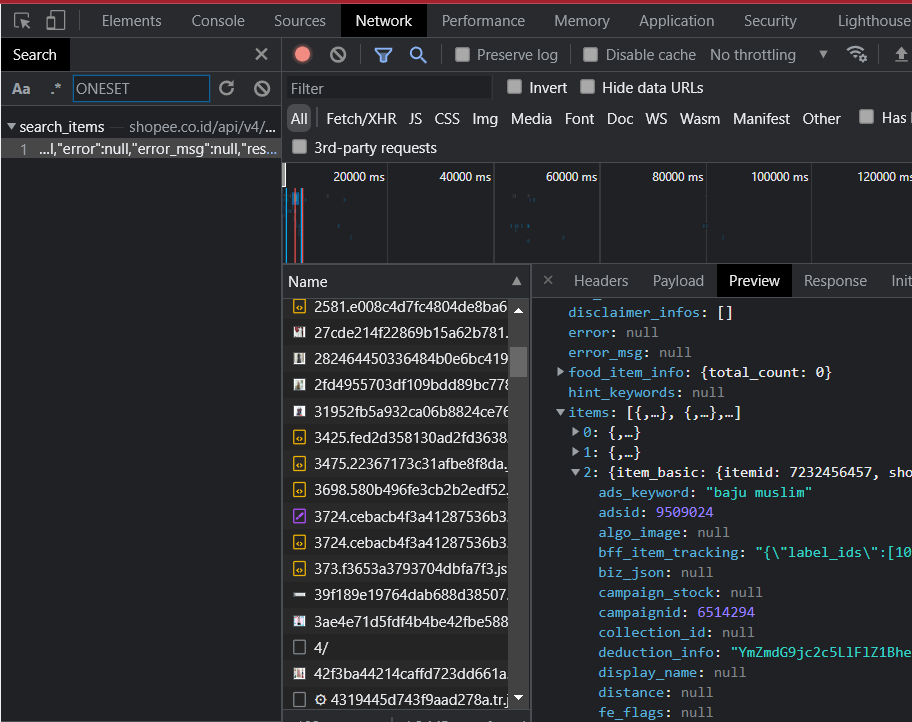

In [110]:
products = r['items']

In [111]:
name_total = []
price_min_total = []
price_max_total = []
sold_total = []
stock_total = []
rating_total = []
location_total = []

for p in products:
    # Get products name
    name = p['item_basic']['name']
    name_total.append(name)
    # Get lower boundary price (min price)
    price_min = int(str(p['item_basic']['price_min'])[:-5])
    price_min_total.append(price_min)
    # Get upper boundary price (max price)
    price_max = int(str(p['item_basic']['price_max'])[:-5])
    price_max_total.append(price_max)
    # Get how many products were sold
    sold = p['item_basic']['historical_sold']
    sold_total.append(sold)
    # Get stock
    stock = p['item_basic']['stock']
    stock_total.append(stock)
    # Get rating
    rating = round(p['item_basic']['item_rating']['rating_star'], 2)
    rating_total.append(rating)
    # Get location
    location = p['item_basic']['shop_location']
    location_total.append(location)

In [112]:
name_total[:10]

['SETELAN EMMA Baju wanita cewe muslim hijab remaja kuliah kerja kondangan pernikahan ngaji lebaran',
 'Setelan Anak Baju Koko Celana Panjang Peci Set Sarkoci Kemeja Kurta Polos Kain Katun Laki Cowok Newborn Baby Bayi TK SD Sekolah Pesantren Madrasah Muslim Islam Umur Usia 0 1 2 3 4 5 6 7 8 9 Tahun 10 11 12 18 24 Bulan Warna Biru Coklat Hijau Remaja Kokoh',
 'GIRLY CARDISET PREMIUM',
 'Baju murah  nia tunik',
 '[COD] OUTFIT TERLARIS - Set Livior 2in1 | Stelan Baju Muslim Remaja | Alivia l Livia Outer + Celana Termurah',
 '[ Bisa Cod ] MURAH BANGET !!! MARISKA SET I MAHALANI SET SYAHIRA BAJU SETELAN WANITA',
 'Baju Muslim Wanita | Maurin Maxy | Gamis Ceruty Premium Terbaru Bahan Ceruti Bungan Bordir Mewah',
 'Baju Muslim Anak Perempuan / Gamis Syari Anak Putih 3 4 5 6 7 8 9 10 11 12 13 14 Tahun',
 'Adieva Tunik | Tunik wanita terbaru | Baju wanita | Baju tunik',
 'Baju Koko anak laki laki Setelan jasko anak laki-laki pakaian muslim anak']

In [113]:
price_min_total[:2]

[118750, 23900]

In [114]:
price_max_total[:2]

[125000, 51900]

In [115]:
sold_total[:10]

[743, 2671, 2258, 602, 14468, 3500, 24, 714, 1071, 2574]

In [116]:
stock_total[:2]

[99, 291141]

In [117]:
rating_total[:5]

[4.54, 4.69, 4.61, 4.67, 4.53]

In [118]:
location_total[:5]

['KOTA JAKARTA PUSAT',
 'KOTA JAKARTA BARAT',
 'KOTA SURAKARTA (SOLO)',
 'KAB. BANDUNG',
 'KOTA BANDUNG']

### Full Workflows

In [119]:
# Import necessary packages
import requests
import csv
import pandas as pd

# Save the data
name_total = []
price_min_total = []
price_max_total = []
sold_total = []
stock_total = []
rating_total = []
location_total = []
img_total = []

for i in range(1, 21):
    newest_page = (i - 1) * 60 # let say page 2 so newest page is 60, page 3 has 120 as newest page
    
    # Make URL API variable
    url = 'https://shopee.co.id/api/v4/search/search_items/'

    # Make parameter variable
    parameter = {
        'by': 'relevancy',
        'keyword': 'baju%20muslim',
        'limit': 60,
        'newest': newest_page,
        'order': 'desc',
        'page_type': 'search',
        'scenario': 'PAGE_GLOBAL_SEARCH',
        'version': 2
    }

    # Make response using .get() function
    response = requests.get(url=url, params=parameter)
    
    # Parse product on r['items']
    r = requests.get(url=url, params=parameter).json()
    products = r['items']
    
    for p in products:
        # Get products name
        name = p['item_basic']['name']
        name_total.append(name)
        # Get lower boundary price (min price)
        price_min = int(str(p['item_basic']['price_min'])[:-5])
        price_min_total.append(price_min)
        # Get upper boundary price (max price)
        price_max = int(str(p['item_basic']['price_max'])[:-5])
        price_max_total.append(price_max)
        # Get how many products were sold
        sold = p['item_basic']['historical_sold']
        sold_total.append(sold)
        # Get stock
        stock = p['item_basic']['stock']
        stock_total.append(stock)
        # Get rating
        rating = round(p['item_basic']['item_rating']['rating_star'], 2)
        rating_total.append(rating)
        # Get location
        location = p['item_basic']['shop_location']
        location_total.append(location)
        # Get images
        img = 'https://cf.shopee.co.id/file/' + p['item_basic']['images'][0] + '_tn'
        img_total.append(img)
    
    print(f'Response: {response.status_code} for page: {i}')

Response: 200 for page: 1
Response: 200 for page: 2
Response: 200 for page: 3
Response: 200 for page: 4
Response: 200 for page: 5
Response: 200 for page: 6
Response: 200 for page: 7
Response: 200 for page: 8
Response: 200 for page: 9
Response: 200 for page: 10
Response: 200 for page: 11
Response: 200 for page: 12
Response: 200 for page: 13
Response: 200 for page: 14
Response: 200 for page: 15
Response: 200 for page: 16
Response: 200 for page: 17
Response: 200 for page: 18
Response: 200 for page: 19
Response: 200 for page: 20


In [120]:
df = pd.DataFrame(data={'name':name_total,
                        'price_min':price_min_total,
                        'price_max':price_max_total,
                        'num_sold':sold_total,
                        'stock':stock_total,
                        'rating':rating_total,
                        'location':location_total,
                        'link_img':img_total})

In [121]:
df.head()

,name,price_min,price_max,num_sold,stock,rating,location,link_img
0,Koko syubbanul muslimin koko azzahir koko baju,38000,65000,2788,3787601,4.67,KOTA PEKALONGAN,https://cf.shopee.co.id/file/088e3dd856de80d87...
1,MS GAMIS BATIK FASHION SRIWEDARI MAXI BUMIL/BU...,65000,65000,29070,19742,4.57,KAB. PEKALONGAN,https://cf.shopee.co.id/file/529a3ecc9105dea75...
2,( TEERBARU ) Aespa Maxi Dress | Gamis wanita |...,45500,60000,1333,4330,4.57,KAB. BANDUNG,https://cf.shopee.co.id/file/3ff4953ee880e78a4...
3,BAJU MUSLIM KHADIJAH SET HIJAB M L XL,75000,80000,726,381,4.63,KAB. BANDUNG,https://cf.shopee.co.id/file/817bcea272af135a9...
4,Limited!! New Original Sandra Maxi Baju Muslim...,58700,58700,1533,2143,4.40,KAB. BANDUNG,https://cf.shopee.co.id/file/88a8c2cf25ee7d9a6...


In [122]:
df.link_img.iloc[0]

'https://cf.shopee.co.id/file/088e3dd856de80d87422b1bf435b8050_tn'

In [123]:
df.to_excel('baju_muslim_shopee_api.xlsx')

### Save the image

In [125]:
len(df)

1200

In [132]:
for i, link in enumerate(df.link_img):
    filename = link.split('/')[-1] + '.jpg'
    r = requests.get(link, stream=True)
    with open(filename, 'wb') as f:
        for chunk in r:
            f.write(chunk)
    print(f'img {i+1} is finished')

img 1 is finished
img 2 is finished
img 3 is finished
img 4 is finished
img 5 is finished
img 6 is finished
img 7 is finished
img 8 is finished
img 9 is finished
img 10 is finished
img 11 is finished
img 12 is finished
img 13 is finished
img 14 is finished
img 15 is finished
img 16 is finished
img 17 is finished
img 18 is finished
img 19 is finished
img 20 is finished
img 21 is finished
img 22 is finished
img 23 is finished
img 24 is finished
img 25 is finished
img 26 is finished
img 27 is finished
img 28 is finished
img 29 is finished
img 30 is finished
img 31 is finished
img 32 is finished
img 33 is finished
img 34 is finished
img 35 is finished
img 36 is finished
img 37 is finished
img 38 is finished
img 39 is finished
img 40 is finished
img 41 is finished
img 42 is finished
img 43 is finished
img 44 is finished
img 45 is finished
img 46 is finished
img 47 is finished
img 48 is finished
img 49 is finished
img 50 is finished
img 51 is finished
img 52 is finished
img 53 is finished
im

## Web Scraping at Yell.com (look alike Traveloka)

In [133]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

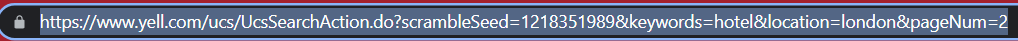

In [134]:
# Create URL, key, location, and page num variable
key = 'hotel'
location = 'london'
page_num = '2'
url = f'https://www.yell.com/ucs/UcsSearchAction.do?scrambleSeed=1218351989&keywords={key}&location={location}&pageNum={page_num}'

In [135]:
url

'https://www.yell.com/ucs/UcsSearchAction.do?scrambleSeed=1218351989&keywords=hotel&location=london&pageNum=2'

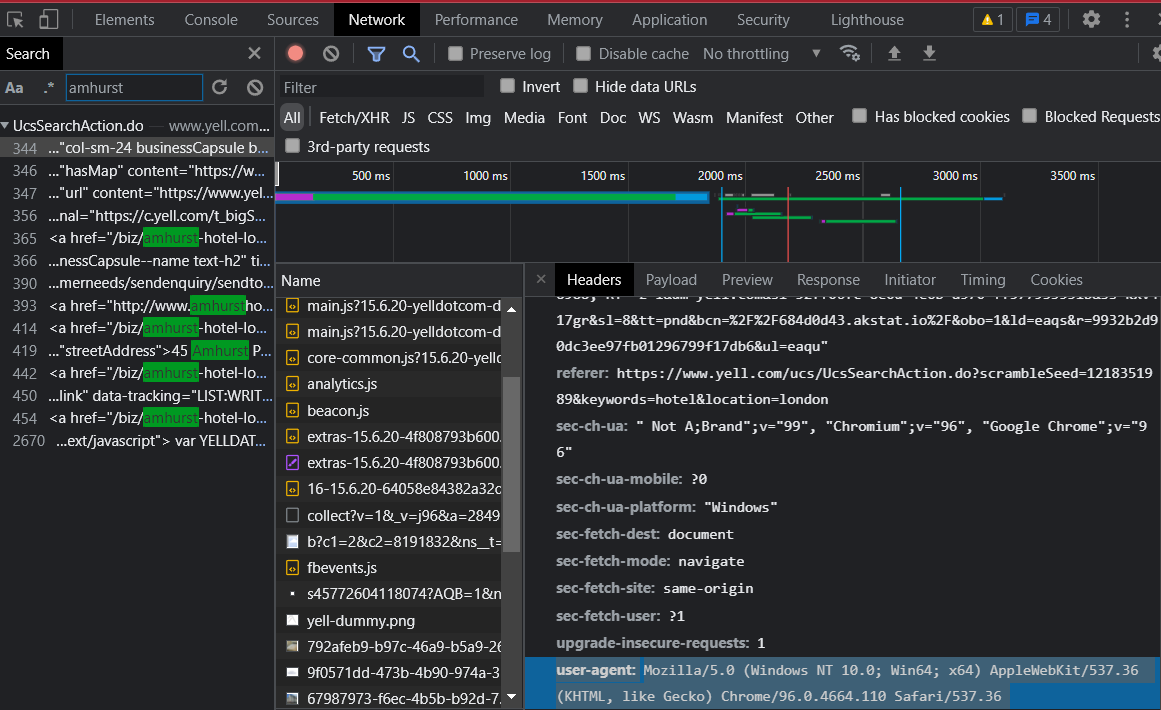

In [136]:
# Create headers variable
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
}

In [137]:
# Create request method
r = requests.get(url=url, headers=headers)
r

<Response [200]>

In [138]:
# Parse using Beautiful Soup
soup = BeautifulSoup(r.text, 'html.parser')

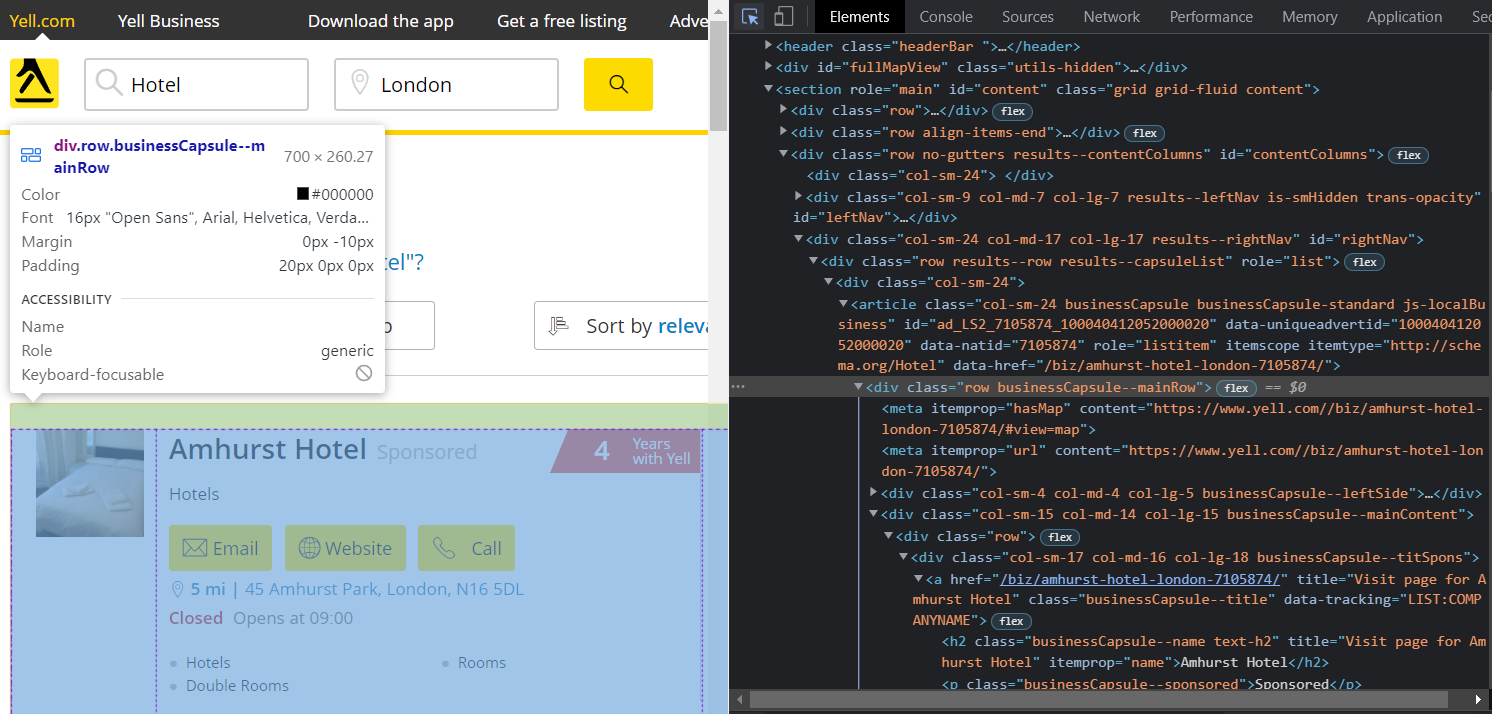

In [139]:
items = soup.find_all('div', {'class': 'row businessCapsule--mainRow'})

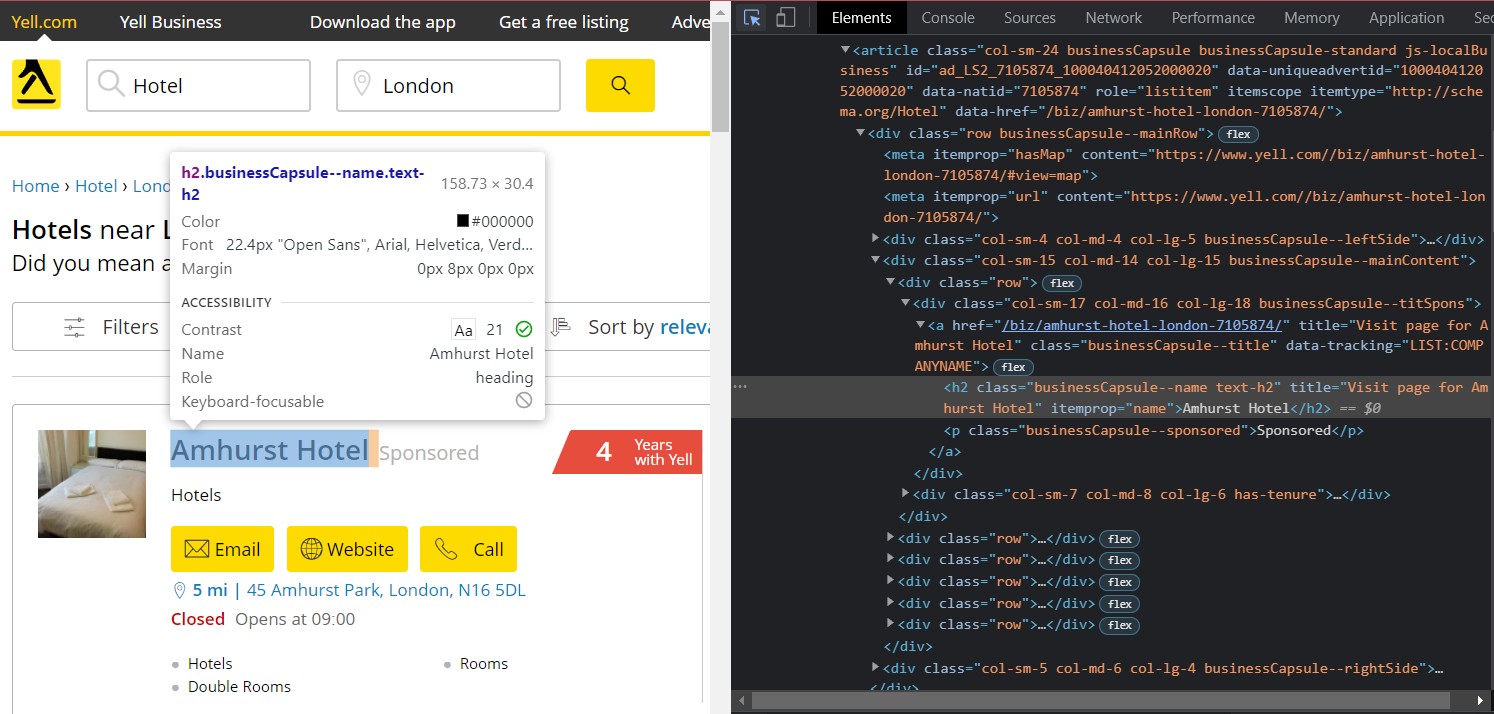

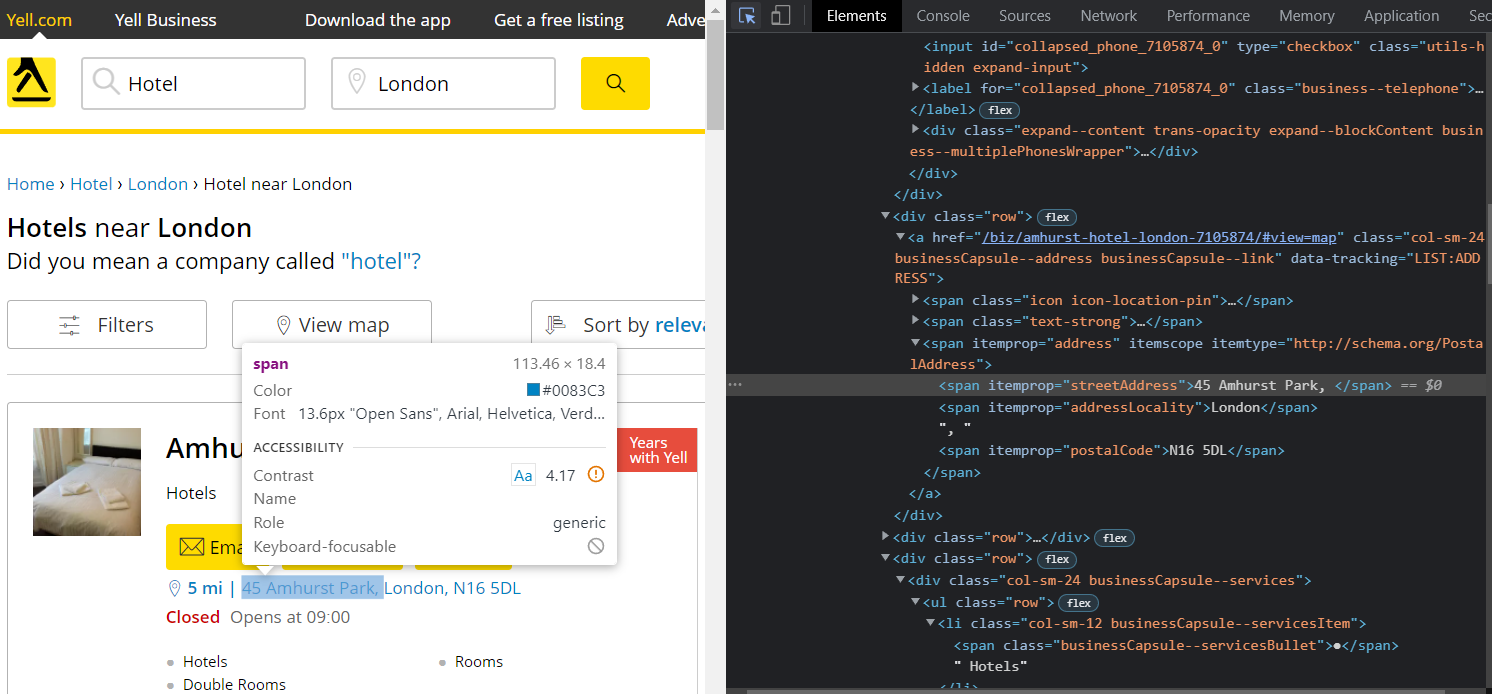

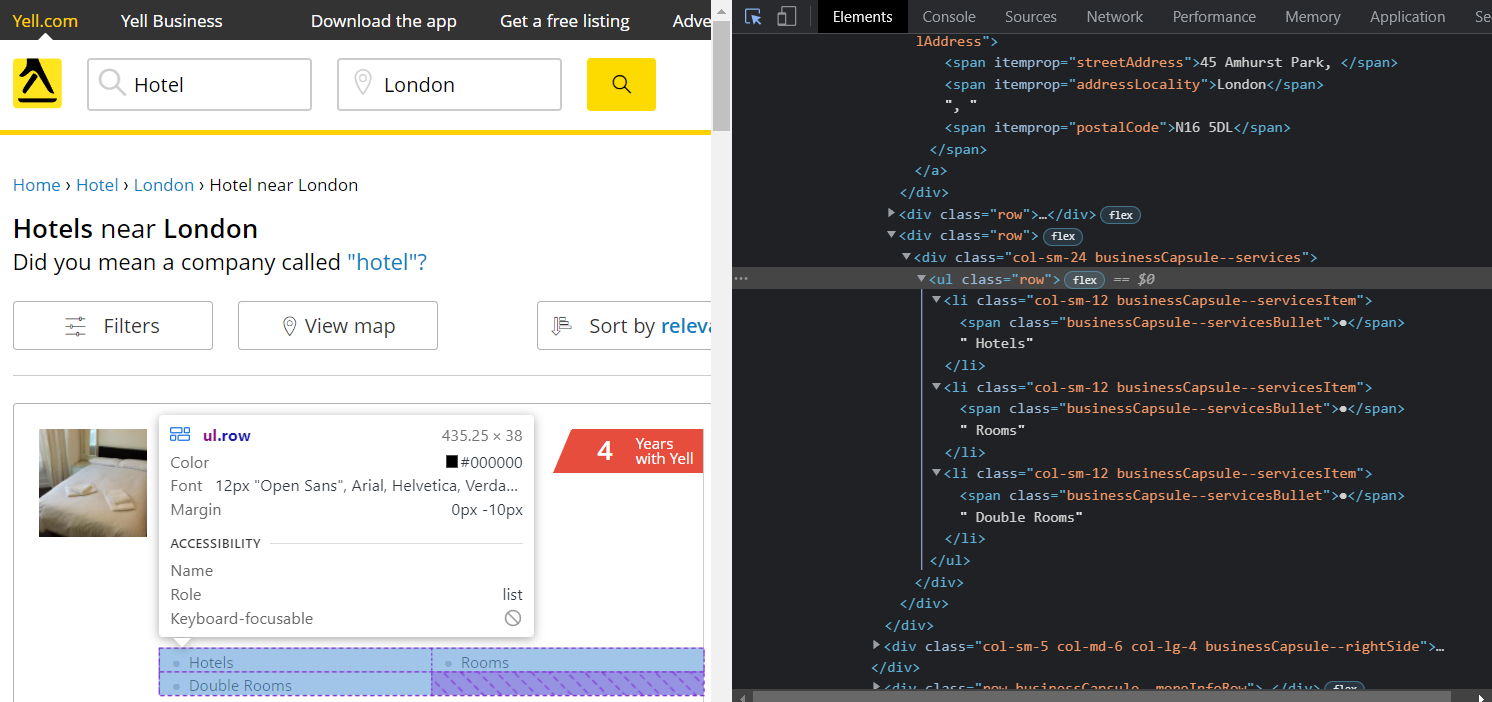

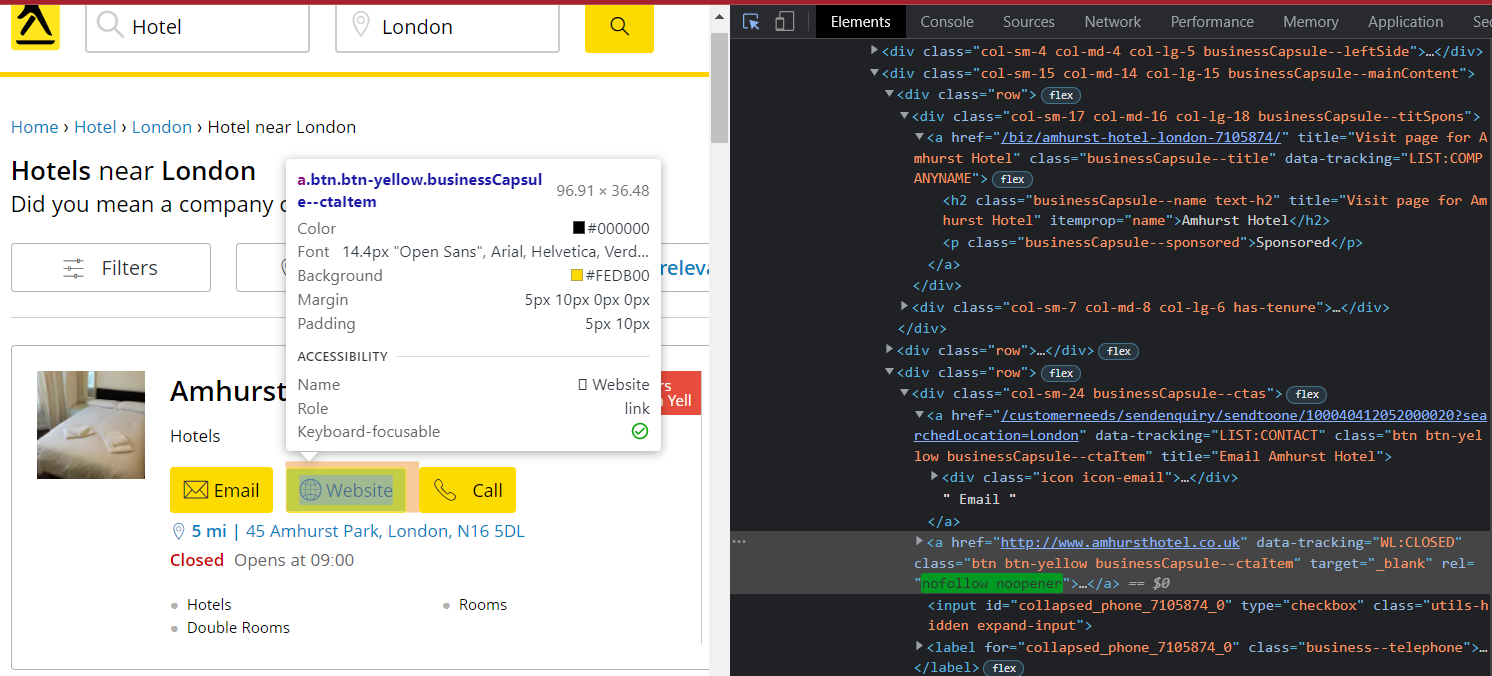

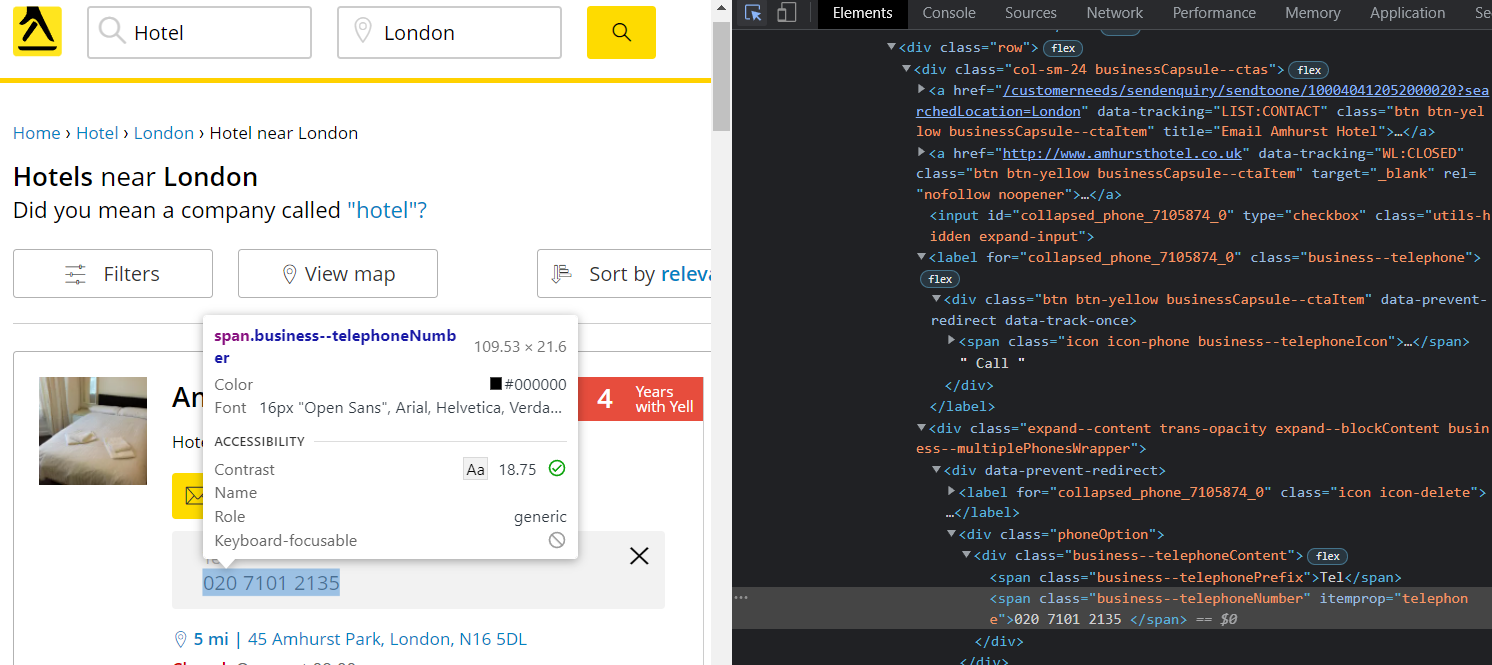

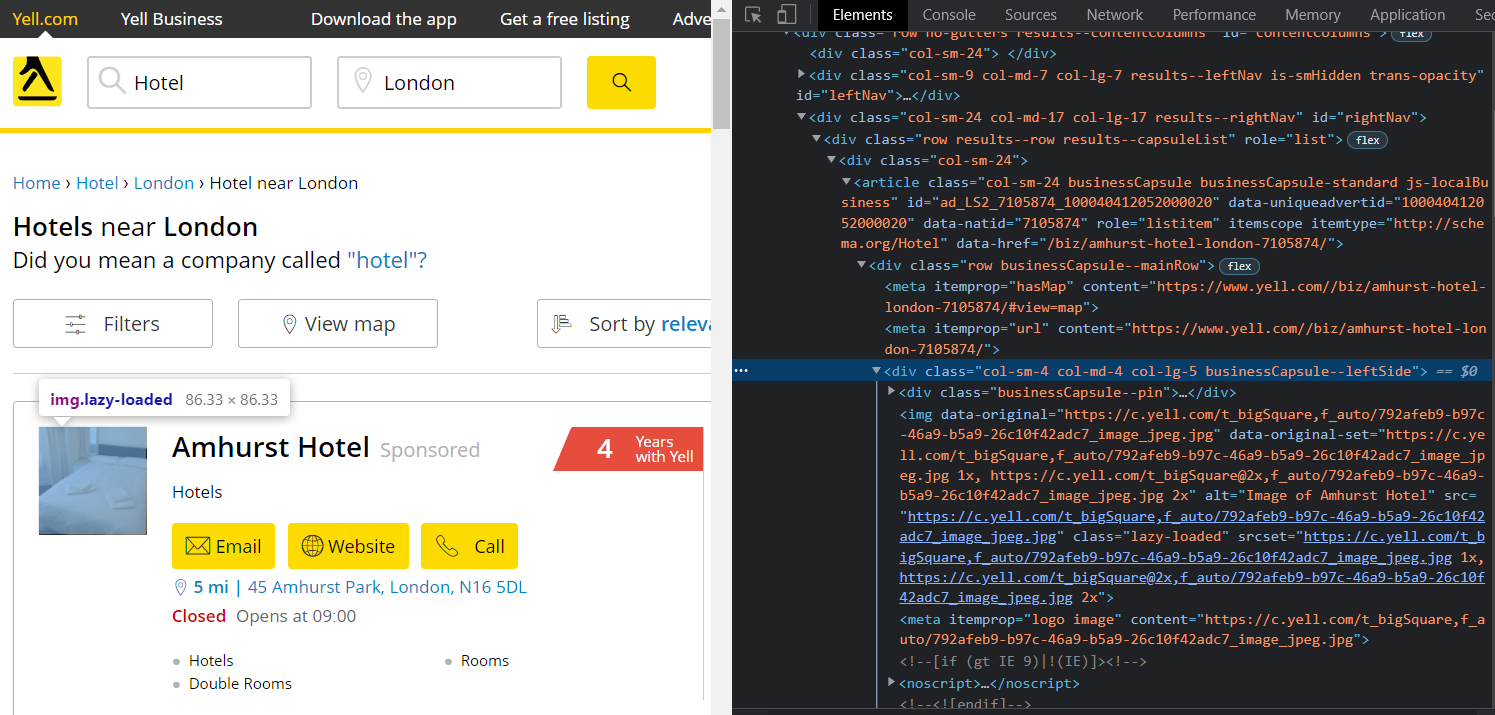

In [149]:
name_total = []
address_total = []
city_total = []
postal_code_total = []
website_total = []
call_num_total = []
img_total = []

for it in items:
    # Find the name
    name = it.find('h2', {'class': 'businessCapsule--name text-h2'}).text # class
    name_total.append(name)
    # Find the address
    address = it.find('span', {'itemprop': 'streetAddress'}).text[:-2] # itemprop
    address_total.append(address)
    # Find the city
    city = it.find('span', {'itemprop':'addressLocality'}).text # itemprop
    city_total.append(city)
    # Find the postcode
    postcode = it.find('span', {'itemprop':'postalCode'}).text # itemprop
    postal_code_total.append(postcode)
    # Find the website
    try: 
        website = it.find('a', {'rel':'nofollow noopener'})['href'] # href link
        website = website.split('//')[1].split('/')[0]
    except: 
        website = ''
    website_total.append(website)
    # Find the call number
    try:
        call_num = it.find('span', {'class': 'business--telephoneNumber'}).text[:-1] # class
    except:
        call_num = ''
    call_num_total.append(call_num)
    # Find image
    img = it.find('div', {'class': 'col-sm-4 col-md-4 col-lg-5 businessCapsule--leftSide'}).find('img')['data-original']
    if not img.startswith('https://c.yell.com'):
        img = 'https://www.yell.com' + img
        img_total.append(img)
    else:
        img = img
        img_total.append(img)

In [150]:
website_total[:3]

['www.amhursthotel.co.uk', 'www.ihg.com', 'www.nadlerhotels.com']

In [151]:
address_total[:3]

['45 Amhurst Park', '1 Leicester Square', '51 Bedford Street']

In [152]:
name_total[:3]

['Amhurst Hotel',
 'Hotel Indigo London - 1 Leicester Square, an IHG Hotel',
 'The Nadler']

In [153]:
city_total[:3]

['London', 'London', 'London']

In [154]:
postal_code_total[:3]

['N16 5DL', 'WC2H 7NA', 'WC2R 0PZ']

In [155]:
call_num_total[:5]

['020 7101 2135',
 '020 3953 4200',
 '020 3146 1790',
 '020 7451 5600',
 '0871 376 9037']

In [156]:
img_total[:5]

['https://c.yell.com/t_bigSquare,f_auto/792afeb9-b97c-46a9-b5a9-26c10f42adc7_image_jpeg.jpg',
 'https://c.yell.com/t_bigRect,f_auto/9f0571dd-473b-4b90-974a-3d56a26203d2_image_png.png',
 'https://c.yell.com/t_bigSquare,f_auto/67987973-f6ec-4b5b-b92d-71a1216ea530_image_jpeg.jpg',
 'https://www.yell.com/searchfe/yframe/yelldotcom/default/_yframe/min/images/yell-dummy.png',
 'https://www.yell.com/searchfe/yframe/yelldotcom/default/_yframe/min/images/yell-dummy.png']

### Full Workflow

In [157]:
# Import necessary packages
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Save the data
name_total = []
address_total = []
city_total = []
postal_code_total = []
website_total = []
call_num_total = []
img_total = []

for i in range(1, 11):
    # Create URL, key, location, and page num variable
    key = 'hotel'
    location = 'london'
    page_num = f'{i}'
    url = f'https://www.yell.com/ucs/UcsSearchAction.do?scrambleSeed=1218351989&keywords={key}&location={location}&pageNum={page_num}'

    # Create headers variable
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
    }

    # Create request method
    r = requests.get(url=url, headers=headers)

    # Parse using Beautiful Soup
    soup = BeautifulSoup(r.text, 'html.parser')

    # Parse the item from soup.find_all()
    items = soup.find_all('div', {'class': 'row businessCapsule--mainRow'})

    for it in items:
        # Find the name
        name = it.find('h2', {'class': 'businessCapsule--name text-h2'}).text # class
        name_total.append(name)
        # Find the address
        address = it.find('span', {'itemprop': 'streetAddress'}).text[:-2] # itemprop
        address_total.append(address)
        # Find the city
        city = it.find('span', {'itemprop':'addressLocality'}).text # itemprop
        city_total.append(city)
        # Find the postcode
        postcode = it.find('span', {'itemprop':'postalCode'}).text # itemprop
        postal_code_total.append(postcode)
        # Find the website
        try: 
            website = it.find('a', {'rel':'nofollow noopener'})['href'] # href link
            website = website.split('//')[1].split('/')[0]
        except: 
            website = ''
        website_total.append(website)
        # Find the call number
        try:
            call_num = it.find('span', {'class': 'business--telephoneNumber'}).text[:-1] # class
        except:
            call_num = ''
        call_num_total.append(call_num)
        # Find image
        img = it.find('div', {'class': 'col-sm-4 col-md-4 col-lg-5 businessCapsule--leftSide'}).find('img')['data-original']
        if not img.startswith('https://c.yell.com'):
            img = 'https://www.yell.com' + img
            img_total.append(img)
        else:
            img = img
            img_total.append(img)
    
    print(f'Statuscode: {r.status_code} for page {i}')

Statuscode: 200 for page 1
Statuscode: 200 for page 2
Statuscode: 200 for page 3
Statuscode: 200 for page 4
Statuscode: 200 for page 5
Statuscode: 200 for page 6
Statuscode: 200 for page 7
Statuscode: 200 for page 8
Statuscode: 200 for page 9
Statuscode: 200 for page 10


In [158]:
df = pd.DataFrame(data={'name':name_total,
                        'address':address_total,
                        'city':city_total,
                        'postal_code':postal_code_total,
                        'website':website_total,
                        'call_number':call_num_total,
                        'link_image':img_total})

In [159]:
df.head()

,name,address,city,postal_code,website,call_number,link_image
0,Amhurst Hotel,45 Amhurst Park,London,N16 5DL,www.amhursthotel.co.uk,020 3597 3113,"https://c.yell.com/t_bigSquare,f_auto/792afeb9..."
1,Aron Guest House Ltd,27 South Ealing Rd,London,W5 4QT,www.aronguesthouse.co.uk,07947 127778,"https://c.yell.com/t_bigRect,f_auto/198e04cd-2..."
2,Normandie Hotel,96 Sussex Gardens,London,W2 1UH,www.normandie-hotel-london.com,020 3031 6984,"https://c.yell.com/t_bigSquare,f_auto/3c6ea713..."
3,St Martin's Lane Hotel London,45 St. Martin's Lane,London,WC2N 4HX,www.sbe.com,020 7300 5500,https://www.yell.com/searchfe/yframe/yelldotco...
4,ME London,336-337 Strand,London,WC2R 1HA,www.mebymelia.com,020 7395 3400,"https://c.yell.com/t_bigSquare,f_auto/d0f10657..."


In [160]:
len(df)

250

In [161]:
df.to_excel('hotel_yell.xlsx')

## Web Scraping on Tokopedia

In [162]:
# Import necessary packages
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [163]:
# Set the url
url = 'https://www.tokopedia.com/p/fashion-pria/tas-pria/tas-selempang-pria?page=1'

# Set the headers
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
}

In [164]:
r = requests.get(url, headers=headers)

In [165]:
r

<Response [200]>

In [166]:
soup = BeautifulSoup(r.text, 'html.parser')

In [167]:
items = soup.find_all('div', {'class':'css-bk6tzz e1nlzfl3'})

In [168]:
name_total = []
price_total = []
loc_total = []

for it in items:
    # Get the product name
    name = it.find('span', {'class':'css-1bjwylw'}).text
    name_total.append(name)
    # Get product price
    price = it.find('span', {'class':'css-o5uqvq'}).text
    price = int(''.join(price[2:].split('.')))
    price_total.append(price)
    # Get location 
    loc = it.find('span', {'class':'css-1kr22w3'}).text
    loc_total.append(loc)

In [169]:
name_total

['TAS SELEMPANG PRIA FREE DOMPET+JAM ATAU HEASHET - Hitam',
 '[TERMURAH] Tas Selempang Pria Wanita Waistbag Professional Keren Murah - Hitam',
 'TAS PINGGANG TACTICAL A318 - Hijau',
 'Tas Selempang Pria Tas Pria Sling Bag Pria Charger USB - TENCENT - Merah',
 'Tas Selempang Pria Kulit Sling Bag kulit USB Port Tas Selempang Bahu01 - Cokelat Tua',
 'KITC Tas Canvas Lembur Dibayar Tote Bag',
 'ANT PROJECT - Tas Selempang Pouch ANT302 Tas Handbag Distro / Vape Bag',
 'Navy Club Tas Selempang Travel - Tas Punggung Tas Dada Tahan Air EJCB',
 'ANT PROJECT - Tas Selempang Messenger Sekolah Kuliah Kerja ANT300',
 'TUM I Alpha Bravo Kelley Sling Bag - Tas Selempang - Russet']

In [170]:
price_total

[39200, 11900, 22500, 179550, 19800, 78000, 33000, 75000, 56000, 3839200]

In [171]:
loc_total

['Jakarta Barat',
 'Kab. Tangerang',
 'Jakarta Pusat',
 'Jakarta Timur',
 'Jakarta Barat',
 'Bandung',
 'Bandung',
 'Jakarta Utara',
 'Bandung',
 'Jakarta Selatan']

### Full Workflows

In [172]:
# Save the data
name_total = []
price_total = []
loc_total = []

for i in range(1, 51):
    # Set the url
    url = 'https://www.tokopedia.com/p/fashion-pria/tas-pria/tas-selempang-pria?page=1'

    # Set the headers
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
    }

    # Request
    r = requests.get(url, headers=headers)

    # Parse the text using beautiful soup
    soup = BeautifulSoup(r.text, 'html.parser')

    # Get the item
    items = soup.find_all('div', {'class':'css-bk6tzz e1nlzfl3'})

    for it in items:
        # Get the product name
        name = it.find('span', {'class':'css-1bjwylw'}).text
        name_total.append(name)
        # Get product price
        price = it.find('span', {'class':'css-o5uqvq'}).text
        price = int(''.join(price[2:].split('.')))
        price_total.append(price)
        # Get location 
        loc = it.find('span', {'class':'css-1kr22w3'}).text
        loc_total.append(loc)
        
    print(f'Request: {r.status_code} for page: {i}')

Request: 200 for page: 1
Request: 200 for page: 2
Request: 200 for page: 3
Request: 200 for page: 4
Request: 200 for page: 5
Request: 200 for page: 6
Request: 200 for page: 7
Request: 200 for page: 8
Request: 200 for page: 9
Request: 200 for page: 10
Request: 200 for page: 11
Request: 200 for page: 12
Request: 200 for page: 13
Request: 200 for page: 14
Request: 200 for page: 15
Request: 200 for page: 16
Request: 200 for page: 17
Request: 200 for page: 18
Request: 200 for page: 19
Request: 200 for page: 20
Request: 200 for page: 21
Request: 200 for page: 22
Request: 200 for page: 23
Request: 200 for page: 24
Request: 200 for page: 25
Request: 200 for page: 26
Request: 200 for page: 27
Request: 200 for page: 28
Request: 200 for page: 29
Request: 200 for page: 30
Request: 200 for page: 31
Request: 200 for page: 32
Request: 200 for page: 33
Request: 200 for page: 34
Request: 200 for page: 35
Request: 200 for page: 36
Request: 200 for page: 37
Request: 200 for page: 38
Request: 200 for page

In [173]:
df = pd.DataFrame(data={'name':name_total,
                        'price':price_total,
                        'location':loc_total})

In [174]:
df.head()

,name,price,location
0,TAS SELEMPANG PRIA FREE DOMPET+JAM ATAU HEASHE...,39200,Jakarta Barat
1,Tas Pria pinggang Dompet /sarung Hp army B318 ...,22500,Jakarta Pusat
2,[TERMURAH] Tas Selempang Pria Wanita Waistbag ...,11900,Kab. Tangerang
3,TAS PINGGANG TACTICAL A318 - Hijau,22500,Jakarta Pusat
4,WS B535 TAS SELEMPANG PRIA / TAS SLEMPANG SHOU...,50800,Jakarta Pusat


In [175]:
len(df)

500

## Web Scraping on Tiket.com

In [176]:
# Import necessary packages
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [177]:
# Set the url
url = 'https://www.tiket.com/hotel/indonesia/city/bandung-108001534490276290/page-3'

# Set the headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
}

In [178]:
r = requests.get(url, headers=headers)

In [179]:
r

<Response [200]>

In [180]:
soup = BeautifulSoup(r.text, 'html.parser')

In [181]:
items = soup.find_all('div', {'class':'card-frame'})

In [182]:
import numpy as np

In [183]:
name_total = []
location_total = []
rating_total = []
impression_total = []
price_total = []
description_total = []
img_total = []

for it in items:
    # Get the name
    name = it.find('h3', {'class':'title ellipsis'}).text
    name_total.append(name)
    # Get the location
    loc = it.find('div', {'class':'location ellipsis'}).text.split(',')[0]
    location_total.append(loc)
    # Get the rating
    try:
        rating = float(it.find('div', {'class':'tiket-rating'}).text)
    except:
        rating = np.nan
    rating_total.append(rating)
    # Get the impression
    try:
        impression = it.find('div', {'class':'rating'}).find('div', {'class':'tiket-impression'}).text
    except:
        impression = ''
    impression_total.append(impression)
    # Get the price
    try:
        price = int(''.join(it.find('div', {'class':'price-wrap'}).find('div', {'class':'after-price'}).text.split('IDR ')[-1].split('.')))
    except:
        price = np.nan
    price_total.append(price)
    # Get the description
    try:
        description = it.find('div', {'class':'description'}).find('div', {'class':'line-clamp-2 description-content'}).text
    except:
        description = ''
    description_total.append(description)
    # Get the images link
    try:
        img = it.find('div', {'class':'image-wrap'}).find('img')['src']
    except:
        img = ''
    img_total.append(img)

In [184]:
name_total[:3]

['Hotel Santika Bandung',
 'Zodiak Sutami by KAGUM Hotels',
 'Sensa Hotel Bandung']

In [185]:
location_total[:3]

['Riau', 'Sukasari', 'Cihampelas']

In [186]:
rating_total[:5]

[4.5, 3.4, 4.2, 4.3, 4.0]

In [187]:
impression_total[:5]

['Good', 'Okay', 'Good', 'Good', 'Good']

In [188]:
price_total[:5]

[584100, 184279, nan, 577530, 500000]

In [190]:
description_total[:3]

['Berlokasi strategis di Jalan Sumatera, Bandung, hanya berjarak 5 menit berjalan kaki dari tujuan belanja...',
 'Menawarkan akomodasi menarik selama berkunjung ke Bandung, Zodiak Sutami by KAGUM Hotels berjarak hanya 12...',
 'Sensa Hotel Bandung yang terletak di sebelah Cihampelas Walk menawarkan akomodasi bintang 4 di kawasan...']

In [191]:
img_total[:3] # Failed to retrieve the img link

['/hotel/v3/assets/hotel-placeholder.png',
 '/hotel/v3/assets/hotel-placeholder.png',
 '/hotel/v3/assets/hotel-placeholder.png']

### Full Workflows

In [193]:
# Save the data
name_total = []
location_total = []
rating_total = []
impression_total = []
price_total = []
description_total = []
img_total = []


for i in range(1, 21):
    # Set the url
    url = f'https://www.tiket.com/hotel/indonesia/city/bandung-108001534490276290/page-{i}'

    # Set the headers
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
    }

    # Get response using requests.get()
    r = requests.get(url, headers=headers)

    # Parse the text using BeautifulSoup
    soup = BeautifulSoup(r.text, 'html.parser')

    # Make items
    items = soup.find_all('div', {'class':'card-frame'})

    for it in items:
        # Get the name
        name = it.find('h3', {'class':'title ellipsis'}).text
        name_total.append(name)
        # Get the location
        loc = it.find('div', {'class':'location ellipsis'}).text.split(',')[0]
        location_total.append(loc)
        # Get the rating
        try:
            rating = float(it.find('div', {'class':'tiket-rating'}).text)
        except:
            rating = np.nan
        rating_total.append(rating)
        # Get the impression
        try:
            impression = it.find('div', {'class':'rating'}).find('div', {'class':'tiket-impression'}).text
        except:
            impression = ''
        impression_total.append(impression)
        # Get the price
        try:
            price = int(''.join(it.find('div', {'class':'price-wrap'}).find('div', {'class':'after-price'}).text.split('IDR ')[-1].split('.')))
        except:
            price = np.nan
        price_total.append(price)
        # Get the description
        try:
            description = it.find('div', {'class':'description'}).find('div', {'class':'line-clamp-2 description-content'}).text
        except:
            description = ''
        description_total.append(description)
        # Get the images link
        try:
            img = it.find('div', {'class':'image-wrap'}).find('img')['src']
        except:
            img = ''
        img_total.append(img)
    
    print(f'Response: {r.status_code} for page: {i}')

Response: 200 for page: 1
Response: 200 for page: 2
Response: 200 for page: 3
Response: 200 for page: 4
Response: 200 for page: 5
Response: 200 for page: 6
Response: 200 for page: 7
Response: 200 for page: 8
Response: 200 for page: 9
Response: 200 for page: 10
Response: 200 for page: 11
Response: 200 for page: 12
Response: 200 for page: 13
Response: 200 for page: 14
Response: 200 for page: 15
Response: 200 for page: 16
Response: 200 for page: 17
Response: 200 for page: 18
Response: 200 for page: 19
Response: 200 for page: 20


In [194]:
df = pd.DataFrame(data={'name':name_total,
                        'location':location_total,
                        'rating':rating_total,
                        'impression':impression_total,
                        'price':price_total,
                        'desc':description_total})

In [195]:
df.head()

,name,location,rating,impression,price,desc
0,Amaris Hotel Cimanuk,Citarum,4.1,Good,297500.0,Amaris Hotel Cimanuk memiliki lokasi strategis...
1,The Naripan Hotel by KAGUM Hotels,Braga,3.4,Okay,778499.0,The Naripan Hotel Bandung berada dekat dengan ...
2,GH Universal Bandung,Setiabudi,4.1,Good,929099.0,GH Universal Bandung terletak di Bandung Utara...
3,InterContinental Bandung Dago Pakar,Cimenyan,4.5,Fantastic,1519351.0,"Lokasi InterContinental Bandung Dago Pakar, an..."
4,El Cavana Hotel Bandung,Andir,4.0,Good,360000.0,Hanya berjarak 800 meter dari Stasiun Kereta A...


In [197]:
df.location.value_counts()

Lembang        176
Sukajadi        81
Lengkong        61
Cihampelas      43
Cicendo         42
              ... 
Cinambo          1
Cilengkrang      1
Sukabungah       1
Kebonlega        1
Rancaekek        1
Name: location, Length: 83, dtype: int64

In [198]:
df.to_excel('hotel_bandung_tiket_com.xlsx')

## Web Scraping on Twitter

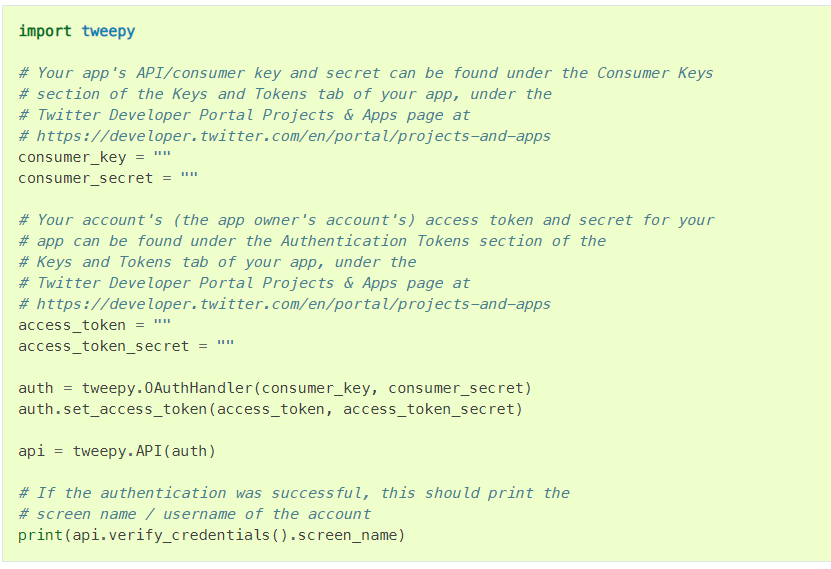

In [1]:
import pandas as pd
import tweepy

In [2]:
accs_token = '1477436660950319106-hftbm5cV20TKbqreEHEL97Z4lRmAio'
accs_token_scrt = 'oNdJdTftlD0PeZkEUKFkk0JYeglC0MEGoCXaIy7Fns9Fz'

api_key = 'tx2NACDvWbs27S8Cd00IE8VJi'
api_key_scrt = 'JlxTU6pNKvHauP5Flk3LCdEMIh8ghuMyAgy4myqZ5NguNZcttJ'

In [61]:
auth = tweepy.OAuthHandler(api_key, api_key_scrt)
auth.set_access_token(accs_token, accs_token_scrt)

In [62]:
api = tweepy.API(auth)

### Using User Id Twitter (Tweets & Replies)

In [97]:
hasil_user = api.user_timeline(screen_name='elonmusk', count=1000)

In [98]:
len(hasil_user)

200

In [99]:
tweet_total = []

for tw in hasil_user:
    # Get tweet text
    tweet = tw.text
    tweet_total.append(tweet)

### Extract the recipient

In [202]:
tweet_total[:10]

['@BLKMDL3 @Tesla 🔥',
 '@MiFSDBetaTester @WholeMarsBlog 🤣',
 '@TheBabylonBee 🤣',
 '@roshanpateI 🤣 $7',
 '@tesla_raj Many UI improvements coming',
 '@CSmithson80 @heydave7 @BLKMDL3 @mims This chart is a big deal',
 '@BLKMDL3 @mims Predicting macroeconomics is challenging, to say the least. My gut feel is maybe around spring or su… https://t.co/nBqZB9gsAy',
 '@mims If history is any guide, not many will make it past the next recession',
 '@waitbutwhy 💯🙏',
 '@T_Ball5 Probably not wrong']

In [183]:
recevier = []
text_total = []

for text in tweet_total:
    recv = []
    txt = []
    for t in text.split(' '):
        if t.startswith('@'):
            recv.append(t)
        else:
            txt.append(t)
    recv = ', '.join(recv)
    txt = ' '.join(txt)
    recevier.append(recv)
    text_total.append(txt)

In [192]:
recevier[:15]

['@BLKMDL3, @Tesla',
 '@MiFSDBetaTester, @WholeMarsBlog',
 '@TheBabylonBee',
 '@roshanpateI',
 '@tesla_raj',
 '@CSmithson80, @heydave7, @BLKMDL3, @mims',
 '@BLKMDL3, @mims',
 '@mims',
 '@waitbutwhy',
 '@T_Ball5',
 '@heydave7',
 '',
 '',
 '@PPathole',
 '@GailAlfarATX, @SawyerMerritt']

In [189]:
text_total[:10]

['🔥',
 '🤣',
 '🤣',
 '🤣 $7',
 'Many UI improvements coming',
 'This chart is a big deal',
 'Predicting macroeconomics is challenging, to say the least. My gut feel is maybe around spring or su… https://t.co/nBqZB9gsAy',
 'If history is any guide, not many will make it past the next recession',
 '💯🙏',
 'Probably not wrong']

In [193]:
df_elon_tweets = pd.DataFrame(data={'tweet': text_total,
                                    'recevier': recevier})

In [197]:
df_elon_tweets.head(15)

,tweet,recevier
0,🔥,"@BLKMDL3, @Tesla"
1,🤣,"@MiFSDBetaTester, @WholeMarsBlog"
2,🤣,@TheBabylonBee
3,🤣 $7,@roshanpateI
4,Many UI improvements coming,@tesla_raj
5,This chart is a big deal,"@CSmithson80, @heydave7, @BLKMDL3, @mims"
6,"Predicting macroeconomics is challenging, to s...","@BLKMDL3, @mims"
7,"If history is any guide, not many will make it...",@mims
8,💯🙏,@waitbutwhy
9,Probably not wrong,@T_Ball5


In [198]:
replies = []
for recv in df_elon_tweets.recevier:
    if len(recv) == 0:
        replies.append(0)
    else:
        replies.append(1)

In [199]:
df_elon_tweets['replies'] = replies

In [200]:
df_elon_tweets.head(15)

,tweet,recevier,replies
0,🔥,"@BLKMDL3, @Tesla",1
1,🤣,"@MiFSDBetaTester, @WholeMarsBlog",1
2,🤣,@TheBabylonBee,1
3,🤣 $7,@roshanpateI,1
4,Many UI improvements coming,@tesla_raj,1
5,This chart is a big deal,"@CSmithson80, @heydave7, @BLKMDL3, @mims",1
6,"Predicting macroeconomics is challenging, to s...","@BLKMDL3, @mims",1
7,"If history is any guide, not many will make it...",@mims,1
8,💯🙏,@waitbutwhy,1
9,Probably not wrong,@T_Ball5,1


### Using Search Bar (Latest Search)

In [533]:
hasil_search = api.search_tweets(q='jakarta', count=100)

In [534]:
tweet_jakarta = []
sender_jakarta = []
time_jakarta = []

for tw in hasil_search:
    # Get latest text search
    tweet = tw.text
    tweet_jakarta.append(tweet)
    # Get the sender
    sender = tw.user.screen_name
    sender_jakarta.append(sender)
    # Get the time uploaded
    time = tw.created_at
    time_jakarta.append(time)

In [535]:
len(tweet_jakarta)

92

In [536]:
tweet_jakarta[:5]

['RT @yudianto99: Jakarta (ANTARA) - Erick Thohir kembali mencatatkan beragam prestasi dalam memimpin Kementerian BUMN pada tahun 2021.\nhttps…',
 'hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw',
 '@BighitKantin halo ka aku ada bts dicon postcard 25k dom jakarta udah co',
 'Just posted a photo @ Jakarta, Indonesia https://t.co/UvNieUHEH7',
 'RT @RoyMNasution3: Team War Room Jakarta kalian Luaaar Biasaaa,👍👍Karena Ketuanya @RAMujiyono \n@AgusYudhoyono https://t.co/e4Lmjk1gNs']

In [537]:
sender_jakarta[:5]

['NgkongRoses', 'neng_jakarta', 'luvenhypee', 'kennysurianto', 'RubyAzila']

In [538]:
time_jakarta[:5]

[datetime.datetime(2022, 1, 2, 5, 6, 12, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 1, 2, 5, 6, 12, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 1, 2, 5, 6, 11, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 1, 2, 5, 6, 7, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 1, 2, 5, 5, 58, tzinfo=datetime.timezone.utc)]

In [539]:
time_jkt_df = pd.DataFrame(data={'date':time_jakarta})
time_jkt_df.head()

,date
0,2022-01-02 05:06:12+00:00
1,2022-01-02 05:06:12+00:00
2,2022-01-02 05:06:11+00:00
3,2022-01-02 05:06:07+00:00
4,2022-01-02 05:05:58+00:00


In [540]:
time_jkt_df.date = time_jkt_df.date + pd.DateOffset(hours=7) # UTC 00.00 the WIB is 07.00

In [541]:
time_jkt_df.head()

,date
0,2022-01-02 12:06:12+00:00
1,2022-01-02 12:06:12+00:00
2,2022-01-02 12:06:11+00:00
3,2022-01-02 12:06:07+00:00
4,2022-01-02 12:05:58+00:00


In [542]:
df_jakarta = pd.DataFrame({'text':tweet_jakarta,
                           'sender':sender_jakarta,
                           'time_upload':time_jkt_df.date})

In [543]:
df_jakarta.head()

,text,sender,time_upload
0,RT @yudianto99: Jakarta (ANTARA) - Erick Thohi...,NgkongRoses,2022-01-02 12:06:12+00:00
1,hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw,neng_jakarta,2022-01-02 12:06:12+00:00
2,@BighitKantin halo ka aku ada bts dicon postca...,luvenhypee,2022-01-02 12:06:11+00:00
3,"Just posted a photo @ Jakarta, Indonesia https...",kennysurianto,2022-01-02 12:06:07+00:00
4,RT @RoyMNasution3: Team War Room Jakarta kalia...,RubyAzila,2022-01-02 12:05:58+00:00


In [544]:
df_jakarta['date_upload'] = df_jakarta.time_upload.dt.date

In [545]:
df_jakarta.head()

,text,sender,time_upload,date_upload
0,RT @yudianto99: Jakarta (ANTARA) - Erick Thohi...,NgkongRoses,2022-01-02 12:06:12+00:00,2022-01-02
1,hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw,neng_jakarta,2022-01-02 12:06:12+00:00,2022-01-02
2,@BighitKantin halo ka aku ada bts dicon postca...,luvenhypee,2022-01-02 12:06:11+00:00,2022-01-02
3,"Just posted a photo @ Jakarta, Indonesia https...",kennysurianto,2022-01-02 12:06:07+00:00,2022-01-02
4,RT @RoyMNasution3: Team War Room Jakarta kalia...,RubyAzila,2022-01-02 12:05:58+00:00,2022-01-02


In [546]:
df_jakarta['time_upload'] = df_jakarta.time_upload.dt.time

In [547]:
df_jakarta.head()

,text,sender,time_upload,date_upload
0,RT @yudianto99: Jakarta (ANTARA) - Erick Thohi...,NgkongRoses,12:06:12,2022-01-02
1,hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw,neng_jakarta,12:06:12,2022-01-02
2,@BighitKantin halo ka aku ada bts dicon postca...,luvenhypee,12:06:11,2022-01-02
3,"Just posted a photo @ Jakarta, Indonesia https...",kennysurianto,12:06:07,2022-01-02
4,RT @RoyMNasution3: Team War Room Jakarta kalia...,RubyAzila,12:05:58,2022-01-02


In [548]:
tweet_jakarta[:5]

['RT @yudianto99: Jakarta (ANTARA) - Erick Thohir kembali mencatatkan beragam prestasi dalam memimpin Kementerian BUMN pada tahun 2021.\nhttps…',
 'hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw',
 '@BighitKantin halo ka aku ada bts dicon postcard 25k dom jakarta udah co',
 'Just posted a photo @ Jakarta, Indonesia https://t.co/UvNieUHEH7',
 'RT @RoyMNasution3: Team War Room Jakarta kalian Luaaar Biasaaa,👍👍Karena Ketuanya @RAMujiyono \n@AgusYudhoyono https://t.co/e4Lmjk1gNs']

In [549]:
is_retweet = []
retweet_from = []
new_text = []
text_final_1 = []
tags = []

for tw in tweet_jakarta:
    if tw.startswith('RT @'):
        # If tweets starts with 'RT @' append is_retweet to 1
        is_retweet.append(1)
        # Get the source of retweet
        rt_from = tw.split(' ')[1][:-1]
        retweet_from.append(rt_from)
        # Get cleaned text from retweet souce
        text = ' '.join(tw.split(' ')[2:])
        new_text.append(text)
               
    else:
        # If tweets don't starts with 'RT @' append is_retweet to 0
        is_retweet.append(0)
        # Set source retweet to empty
        retweet_from.append('')
        # Append original text
        text = tw
        new_text.append(text)
        
# Get new text after remove tags
for word in new_text:
    tg = []
    txt = []
    for t in word.split(' '):
        if t.startswith('@'):
            tg.append(t)
        else:
            txt.append(t)
    
    tg = ', '.join(tg)
    txt = ' '.join(txt)
    tags.append(tg)
    text_final_1.append(txt)

In [550]:
is_retweet[:5]

[1, 0, 0, 0, 1]

In [551]:
retweet_from[:5]

['@yudianto99', '', '', '', '@RoyMNasution3']

In [552]:
new_text[:5]

['Jakarta (ANTARA) - Erick Thohir kembali mencatatkan beragam prestasi dalam memimpin Kementerian BUMN pada tahun 2021.\nhttps…',
 'hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw',
 '@BighitKantin halo ka aku ada bts dicon postcard 25k dom jakarta udah co',
 'Just posted a photo @ Jakarta, Indonesia https://t.co/UvNieUHEH7',
 'Team War Room Jakarta kalian Luaaar Biasaaa,👍👍Karena Ketuanya @RAMujiyono \n@AgusYudhoyono https://t.co/e4Lmjk1gNs']

In [553]:
text_final_1[:5]

['Jakarta (ANTARA) - Erick Thohir kembali mencatatkan beragam prestasi dalam memimpin Kementerian BUMN pada tahun 2021.\nhttps…',
 'hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw',
 'halo ka aku ada bts dicon postcard 25k dom jakarta udah co',
 'Just posted a photo Jakarta, Indonesia https://t.co/UvNieUHEH7',
 'Team War Room Jakarta kalian Luaaar Biasaaa,👍👍Karena Ketuanya \n@AgusYudhoyono https://t.co/e4Lmjk1gNs']

In [554]:
tags[:5]

['', '', '@BighitKantin', '@', '@RAMujiyono']

In [555]:
df_jakarta.head()

,text,sender,time_upload,date_upload
0,RT @yudianto99: Jakarta (ANTARA) - Erick Thohi...,NgkongRoses,12:06:12,2022-01-02
1,hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw,neng_jakarta,12:06:12,2022-01-02
2,@BighitKantin halo ka aku ada bts dicon postca...,luvenhypee,12:06:11,2022-01-02
3,"Just posted a photo @ Jakarta, Indonesia https...",kennysurianto,12:06:07,2022-01-02
4,RT @RoyMNasution3: Team War Room Jakarta kalia...,RubyAzila,12:05:58,2022-01-02


### Final Workflows

In [556]:
df_jakarta['text'] = text_final_1
df_jakarta['is_retweet'] = is_retweet
df_jakarta['retweet_from'] = retweet_from
df_jakarta['tags'] = tags

In [557]:
df_jakarta.head(20)

,text,sender,time_upload,date_upload,is_retweet,retweet_from,tags
0,Jakarta (ANTARA) - Erick Thohir kembali mencat...,NgkongRoses,12:06:12,2022-01-02,1,@yudianto99,
1,hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw,neng_jakarta,12:06:12,2022-01-02,0,,
2,halo ka aku ada bts dicon postcard 25k dom jak...,luvenhypee,12:06:11,2022-01-02,0,,@BighitKantin
3,"Just posted a photo Jakarta, Indonesia https:/...",kennysurianto,12:06:07,2022-01-02,0,,@
4,"Team War Room Jakarta kalian Luaaar Biasaaa,👍👍...",RubyAzila,12:05:58,2022-01-02,1,@RoyMNasution3,@RAMujiyono
5,[HELP RT]\n\n‼️𝗪𝗔𝗡𝗧 𝗧𝗢 𝗦𝗘𝗟𝗟‼️\n\nTear R : 1.20...,kookiedough__,12:05:53,2022-01-02,0,,
6,Real pijat urut massage bukan asal elus dan re...,mistardj1,12:05:52,2022-01-02,1,@MsgPram,
7,https://t.co/PPqjRF6QXP,alex_hunter146,12:05:49,2022-01-02,0,,"@cagubnyinyir2, @marsonom97, @ByuCyd, @PJayaka..."
8,Paling juga mlipir kyk aki aki yang dulu berna...,AjrilArham,12:05:46,2022-01-02,1,@WagimanDeep212_,
9,Dom jakarta https://t.co/748qO5cXeq,sygjaeyong,12:05:41,2022-01-02,0,,@sellkpopfess


In [558]:
df_jakarta.text.iloc[1].split(' ')

['hasil', 'jepretan', 'sendiri😂', 'https://t.co/6OFjuKW8Zw']

In [559]:
import regex

In [560]:
regex.sub('\n', ' ', df_jakarta.text.iloc[2])

'halo ka aku ada bts dicon postcard 25k dom jakarta udah co'

In [561]:
regex.findall('\w+', df_jakarta.text.iloc[1])

['hasil', 'jepretan', 'sendiri', 'https', 't', 'co', '6OFjuKW8Zw']

In [562]:
text_final_2 = []
link_total = []

for text in text_final_1:
    txt_1 = text.split(' ')
    link_first = []
    
    new_text_1 = []
    for t in txt_1:
        if not t.startswith('https:'):
            new_text_1.append(t)
        else:
            link_first.append(t)
    
    link_first = ', '.join(link_first)
    link_total.append(link_first)
    
    new_text_1 = ' '.join(new_text_1)
    
    txt_2 = ' '.join(regex.findall('\w+', new_text_1))
    text_final_2.append(txt_2)

In [563]:
print(link_total[:50])

['', 'https://t.co/6OFjuKW8Zw', '', 'https://t.co/UvNieUHEH7', 'https://t.co/e4Lmjk1gNs', 'https://t.co/DuW3vFeMdg', '', 'https://t.co/PPqjRF6QXP', '', 'https://t.co/748qO5cXeq', '', 'https://t.co/1kveurGAqj', 'https://t.co/lwGPcn8ym7', '', '', 'https://t.co/sjX0KUkcrg', '', '', 'https://t.co/fWaUwgd…', 'https://t.co/EinMmM6ucY', 'https://t.co/KIBfVxDNuf', 'https://t.co/1KGVYxx357', 'https://t.co/ZVRZ2GnaAc, https://t.co/3Y…', '', '', 'https://t.co/1cyMQi3OMO', 'https://t.co/awiCFDNu7B', 'https://t.co/ZVRZ2GnaAc, https://t.co/3Y…', 'https://t.co/NeF6rUFo7s', '', '', 'https://t.co/xCQ13Dx04v', '', '', '', 'https://t.co/ZVRZ2GnaAc, https://t.co/3Y…', 'https://t.co/ZVRZ2GnaAc, https://t.co/3Y…', '', 'https://t.co/B4utmNPx76', 'https://t.co/4bYaqVpmfJ', 'https://t.co/NutBvGgFuR', '', '', 'https://t.co/tWUSRHoO3X', '', '', 'https://t.co/7fTCUqtLe8', '', '', 'https://t.co/NrNgFS8AzF']


In [564]:
len(link_total)

92

In [565]:
len(text_final_2)

92

In [566]:
text_final_2[:5]

['Jakarta ANTARA Erick Thohir kembali mencatatkan beragam prestasi dalam memimpin Kementerian BUMN pada tahun 2021 https',
 'hasil jepretan sendiri',
 'halo ka aku ada bts dicon postcard 25k dom jakarta udah co',
 'Just posted a photo Jakarta Indonesia',
 'Team War Room Jakarta kalian Luaaar Biasaaa Karena Ketuanya AgusYudhoyono']

In [567]:
df_jakarta.head()

,text,sender,time_upload,date_upload,is_retweet,retweet_from,tags
0,Jakarta (ANTARA) - Erick Thohir kembali mencat...,NgkongRoses,12:06:12,2022-01-02,1,@yudianto99,
1,hasil jepretan sendiri😂 https://t.co/6OFjuKW8Zw,neng_jakarta,12:06:12,2022-01-02,0,,
2,halo ka aku ada bts dicon postcard 25k dom jak...,luvenhypee,12:06:11,2022-01-02,0,,@BighitKantin
3,"Just posted a photo Jakarta, Indonesia https:/...",kennysurianto,12:06:07,2022-01-02,0,,@
4,"Team War Room Jakarta kalian Luaaar Biasaaa,👍👍...",RubyAzila,12:05:58,2022-01-02,1,@RoyMNasution3,@RAMujiyono


In [568]:
df_jakarta['text'] = text_final_2
df_jakarta['link'] = link_total

In [569]:
df_jakarta.head(10)

,text,sender,time_upload,date_upload,is_retweet,retweet_from,tags,link
0,Jakarta ANTARA Erick Thohir kembali mencatatka...,NgkongRoses,12:06:12,2022-01-02,1,@yudianto99,,
1,hasil jepretan sendiri,neng_jakarta,12:06:12,2022-01-02,0,,,https://t.co/6OFjuKW8Zw
2,halo ka aku ada bts dicon postcard 25k dom jak...,luvenhypee,12:06:11,2022-01-02,0,,@BighitKantin,
3,Just posted a photo Jakarta Indonesia,kennysurianto,12:06:07,2022-01-02,0,,@,https://t.co/UvNieUHEH7
4,Team War Room Jakarta kalian Luaaar Biasaaa Ka...,RubyAzila,12:05:58,2022-01-02,1,@RoyMNasution3,@RAMujiyono,https://t.co/e4Lmjk1gNs
5,HELP RT ️𝗪𝗔𝗡𝗧 𝗧𝗢 𝗦𝗘𝗟𝗟 ️ Tear R 1 200k Tear Y 9...,kookiedough__,12:05:53,2022-01-02,0,,,https://t.co/DuW3vFeMdg
6,Real pijat urut massage bukan asal elus dan re...,mistardj1,12:05:52,2022-01-02,1,@MsgPram,,
7,,alex_hunter146,12:05:49,2022-01-02,0,,"@cagubnyinyir2, @marsonom97, @ByuCyd, @PJayaka...",https://t.co/PPqjRF6QXP
8,Paling juga mlipir kyk aki aki yang dulu berna...,AjrilArham,12:05:46,2022-01-02,1,@WagimanDeep212_,,
9,Dom jakarta,sygjaeyong,12:05:41,2022-01-02,0,,@sellkpopfess,https://t.co/748qO5cXeq


In [570]:
df_jakarta.iloc[8]

text            Paling juga mlipir kyk aki aki yang dulu berna...
sender                                                 AjrilArham
time_upload                                              12:05:46
date_upload                                            2022-01-02
is_retweet                                                      1
retweet_from                                     @WagimanDeep212_
tags                                                             
link                                                             
Name: 8, dtype: object

In [571]:
df_jakarta.to_excel('twitter_latest_jakarta_info_scraped.xlsx')

## Web Scraping on Kompas 

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import regex

### Trending News

In [4]:
url = 'https://www.kompas.tv/'

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
}

In [5]:
r = requests.get(url, headers=headers)

In [6]:
r

<Response [200]>

In [7]:
soup = BeautifulSoup(r.text, 'html.parser')

In [8]:
trendings = soup.find_all('div', {'class':'popular__item_one'})

In [9]:
title_total = []
link_total = []

for tr in trendings:
    # Get title
    title = tr.find('h3', {'class':'pop_title_one'}).text
    title_total.append(title)
    # Get links
    link = tr.find('h3', {'class':'pop_title_one'}).find('a')['href']
    link_total.append(link)

In [10]:
title_total

['\nAnies: Saya Tidak Minta Anda Menyukai Saya, tapi Saya Minta Anda Bantu Bangun Jakarta\n',
 '\nRezekinya Melimpah, 5 Zodiak Ini Ditakdirkan Kaya Raya, Ada Punyamu?\n',
 '\nIntip Gaji dan Tunjangan Komandan TNI AD dari Pangdam hingga Danramil\n',
 '\nPenunggak Pajak Siapkan BPKB dan STNK, Pemutihan Kendaraan Berlanjut Januari 2022 di Wilayah Ini\n',
 '\nShin Tae-yong: Turnamen Berikutnya Kami Calon Juara\n']

In [11]:
regex.sub('\n', '', title_total[4])

'Shin Tae-yong: Turnamen Berikutnya Kami Calon Juara'

In [12]:
' '.join(regex.findall('\w+', title_total[4]))

'Shin Tae yong Turnamen Berikutnya Kami Calon Juara'

In [13]:
title_total_trend = []

for title in title_total:
    txt = regex.sub('\n', '', title)
    title_total_trend.append(txt)

In [14]:
link_total

['https://www.kompas.tv/article/247542/anies-saya-tidak-minta-anda-menyukai-saya-tapi-saya-minta-anda-bantu-bangun-jakarta?medium=newstrending&so=1',
 'https://www.kompas.tv/article/247539/rezekinya-melimpah-5-zodiak-ini-ditakdirkan-kaya-raya-ada-punyamu?medium=newstrending&so=2',
 'https://www.kompas.tv/article/247538/intip-gaji-dan-tunjangan-komandan-tni-ad-dari-pangdam-hingga-danramil?medium=newstrending&so=3',
 'https://www.kompas.tv/article/247533/penunggak-pajak-siapkan-bpkb-dan-stnk-pemutihan-kendaraan-berlanjut-januari-2022-di-wilayah-ini?medium=newstrending&so=4',
 'https://www.kompas.tv/article/247521/shin-tae-yong-turnamen-berikutnya-kami-calon-juara?medium=newstrending&so=5']

In [15]:
title_total_trend

['Anies: Saya Tidak Minta Anda Menyukai Saya, tapi Saya Minta Anda Bantu Bangun Jakarta',
 'Rezekinya Melimpah, 5 Zodiak Ini Ditakdirkan Kaya Raya, Ada Punyamu?',
 'Intip Gaji dan Tunjangan Komandan TNI AD dari Pangdam hingga Danramil',
 'Penunggak Pajak Siapkan BPKB dan STNK, Pemutihan Kendaraan Berlanjut Januari 2022 di Wilayah Ini',
 'Shin Tae-yong: Turnamen Berikutnya Kami Calon Juara']

### Automate the task on WA

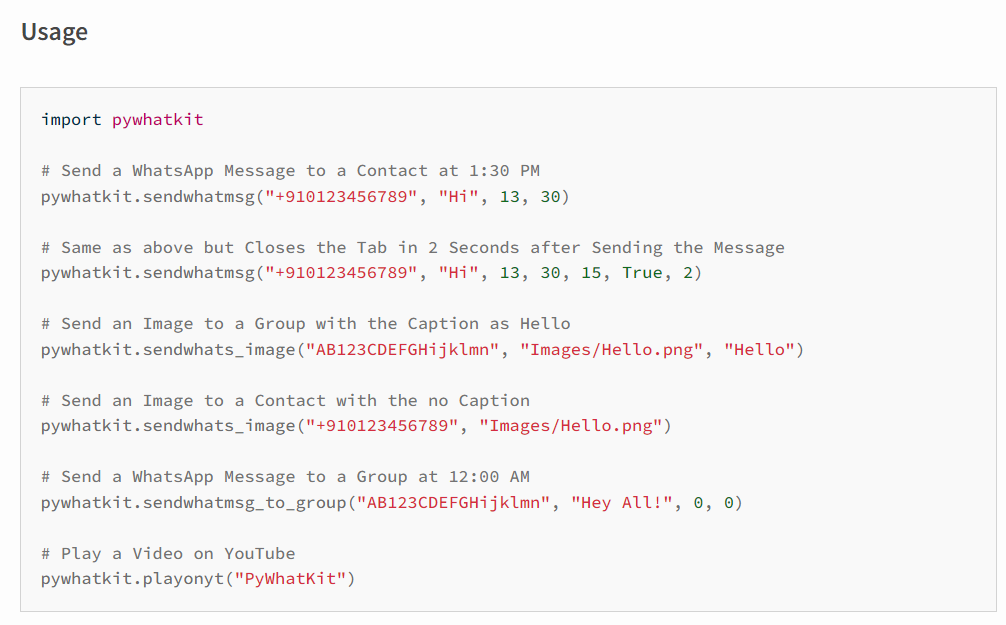

In [16]:
import pywhatkit as wa

In [17]:
text = ''

for i in range(0, 5):
    text += f'Trending {i+1}: {title_total_trend[i]},\nlink: {link_total[i]}\n\n'

In [18]:
print(text)

Trending 1: Anies: Saya Tidak Minta Anda Menyukai Saya, tapi Saya Minta Anda Bantu Bangun Jakarta,
link: https://www.kompas.tv/article/247542/anies-saya-tidak-minta-anda-menyukai-saya-tapi-saya-minta-anda-bantu-bangun-jakarta?medium=newstrending&so=1

Trending 2: Rezekinya Melimpah, 5 Zodiak Ini Ditakdirkan Kaya Raya, Ada Punyamu?,
link: https://www.kompas.tv/article/247539/rezekinya-melimpah-5-zodiak-ini-ditakdirkan-kaya-raya-ada-punyamu?medium=newstrending&so=2

Trending 3: Intip Gaji dan Tunjangan Komandan TNI AD dari Pangdam hingga Danramil,
link: https://www.kompas.tv/article/247538/intip-gaji-dan-tunjangan-komandan-tni-ad-dari-pangdam-hingga-danramil?medium=newstrending&so=3

Trending 4: Penunggak Pajak Siapkan BPKB dan STNK, Pemutihan Kendaraan Berlanjut Januari 2022 di Wilayah Ini,
link: https://www.kompas.tv/article/247533/penunggak-pajak-siapkan-bpkb-dan-stnk-pemutihan-kendaraan-berlanjut-januari-2022-di-wilayah-ini?medium=newstrending&so=4

Trending 5: Shin Tae-yong: Turname

In [21]:
wa.sendwhatmsg(phone_no = '+6282312768482',
               message = text,
               time_hour = pd.to_datetime('today').hour,
               time_min = pd.to_datetime('today').minute + 2)

In 95 Seconds WhatsApp will open and after 15 Seconds Message will be Delivered!


### Get the content

In [199]:
url = link_total[0]

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
}

r = requests.get(url, headers=headers)

In [200]:
r

<Response [200]>

In [201]:
soup = BeautifulSoup(r.text, 'html.parser')

In [202]:
items = soup.find_all('section', {'class': 'ex'})

In [203]:
paragraph = []

for it in items:
    par = it.find('div', {'class':'paragraph'})
    paragraph.append(par)

In [213]:
paragraph[0]

<div class="paragraph" id="paragraph">
<figure> <figcaption>Gubernur DKI Jakarta Anies Baswedan merevisi kenaikan UMP DKI Jakarta dari 0,8 persen menjadi 5,1 persen. Namun, banyak pihak yang harus mempertanyakan dasar hukum yang digunakan Anies dalam mengambil keputusan tersebut (22/12/2021). (Sumber: Tangkapan Layar YouTube Anies Baswedan.)</figcaption> </figure> <p><p><strong>JAKARTA, KOMPAS.TV</strong> - Gubernur DKI Jakarta Anies Baswedan mengatakan, ia tidak mempermasalahkan jika ada sejumlah pihak yang tidak menyukai dirinya selama mereka ikut membantu membangun Jakarta. </p> <p>"Tapi dari awal saya sering mengatakan, saya tidak minta Anda untuk menyukai saya, tapi saya minta Anda untuk bantu membangun Jakarta dalam kondisi sebelum Covid itu," kata Anies dalam tayangan You Tubenya bertajuk Makna, Rasa, dan Asa #DariDekat yang diunggah Sabtu (1/12/2021).</p> <p>Di masa pandemi ini, Anies meminta agar warga Jakarta saling bahu membahu membantu sesama tanpa melihat apakah orang ters

In [205]:
import regex

In [206]:
text = ' '.join(regex.findall('\w+', str(paragraph[0])))

In [207]:
text = regex.sub('div', ' ', text)
text = regex.sub('class', ' ', text)
text = regex.sub('paragraph', ' ', text)
text = regex.sub('id', ' ', text)
text = regex.sub('strong', ' ', text)
text = regex.sub('figure', ' ', text)
text = regex.sub('figcaption', ' ', text)
text = regex.sub(' a ', ' ', text)
text = regex.sub(' p ', ' ', text)
text = regex.sub('href', 'link: ', text)

In [208]:
text = regex.sub(' p ', ' ', text)

In [209]:
text = regex.sub('t ak', 'tidak', text)
text = regex.sub('Cov ', 'Covid', text)

In [210]:
text = text.strip()

In [211]:
print(text)

Gubernur DKI Jakarta Anies Baswedan merevisi kenaikan UMP DKI Jakarta dari 0 8 persen menjadi 5 1 persen Namun banyak pihak yang harus mempertanyakan dasar hukum yang digunakan Anies dalam mengambil keputusan tersebut 22 12 2021 Sumber Tangkapan Layar YouTube Anies Baswedan       JAKARTA KOMPAS TV   Gubernur DKI Jakarta Anies Baswedan mengatakan ia tidak mempermasalahkan jika ada sejumlah pihak yang tidak menyukai dirinya selama mereka ikut membantu membangun Jakarta Tapi dari awal saya sering mengatakan saya tidak minta Anda untuk menyukai saya tapi saya minta Anda untuk bantu membangun Jakarta dalam kondisi sebelum Covid itu kata Anies dalam tayangan You Tubenya bertajuk Makna Rasa dan Asa DariDekat yang diunggah Sabtu 1 12 2021 Di masa pandemi ini Anies meminta agar warga Jakarta saling bahu membahu membantu sesama tanpa melihat apakah orang tersebut menyukainya sebagai gubernur atau tidak Saya minta Anda untuk ikut menolong sesama di Jakarta saya minta Anda untuk membantu semua keg

In [243]:
### Full Workflow
full_paragraph = []

for i in range(0, 5):
    
    url = link_total[i]

    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
    }

    r = requests.get(url, headers=headers)
    
    soup = BeautifulSoup(r.text, 'html.parser')
    
    items = soup.find_all('section', {'class': 'ex'})
    
    paragraph = []

    for it in items:
        par = it.find('div', {'class':'paragraph'})
        paragraph.append(par)
    
    text = ' '.join(regex.findall('\w+', str(paragraph[0])))
    
    text = regex.sub('div', ' ', text)
    text = regex.sub('class', ' ', text)
    text = regex.sub('paragraph', ' ', text)
    text = regex.sub('id', ' ', text)
    text = regex.sub('strong', ' ', text)
    text = regex.sub('figure', ' ', text)
    text = regex.sub('figcaption', ' ', text)
    text = regex.sub(' a ', ' ', text)
    text = regex.sub(' p ', ' ', text)
    text = regex.sub(' u ', ' ', text)
    text = regex.sub('href', 'link: ', text)
    text = regex.sub('p ', ' ', text)
    text = regex.sub('t ak', 'tidak', text)
    text = regex.sub('Cov ', 'Covid', text)
    text = regex.sub('h1', ' ', text)
    text = regex.sub('h2', ' ', text)
    text = regex.sub('  ', ' ', text)
    text = regex.sub('   ', ' ', text)
    text = regex.sub('    ', ' ', text)
    text = regex.sub(' em ', ' ', text)
    text = text.strip()
    
    full_paragraph.append(text)
    print(f'Content {i+1} is finished')

Content 1 is finished
Content 2 is finished
Content 3 is finished
Content 4 is finished
Content 5 is finished


In [244]:
full_paragraph[0]

'Gubernur DKI Jakarta Anies Baswedan merevisi kenaikan UMP DKI Jakarta dari 0 8 persen menjadi 5 1 persen Namun banyak pihak yang harus mempertanyakan dasar hukum yang digunakan Anies dalam mengambil keputusan tersebut 22 12 2021 Sumber Tangkapan Layar YouTube Anies Baswedan  JAKARTA KOMPAS TV  Gubernur DKI Jakarta Anies Baswedan mengatakan ia tidak mempermasalahkan jika ada sejumlah pihak yang tidak menyukai dirinya selama mereka ikut membantu membangun Jakarta Tapi dari awal saya sering mengatakan saya tidak minta Anda untuk menyukai saya tapi saya minta Anda untuk bantu membangun Jakarta dalam kondisi sebelum Covid itu kata Anies dalam tayangan You Tubenya bertajuk Makna Rasa dan Asa DariDekat yang diunggah Sabtu 1 12 2021 Di masa pandemi ini Anies meminta agar warga Jakarta saling bahu membahu membantu sesama tanpa melihat apakah orang tersebut menyukainya sebagai gubernur atau tidak Saya minta Anda untuk ikut menolong sesama di Jakarta saya minta Anda untuk membantu semua kegiatan

In [245]:
text = ''

for i in range(0, 5):
    text += f'Trending {i+1}: {title_total_trend[i]},\nLink: {link_total[i]}\nContent:\n{full_paragraph[i]}\n\n\n'

In [246]:
print(text)

Trending 1: Anies: Saya Tidak Minta Anda Menyukai Saya, tapi Saya Minta Anda Bantu Bangun Jakarta,
Link: https://www.kompas.tv/article/247542/anies-saya-tidak-minta-anda-menyukai-saya-tapi-saya-minta-anda-bantu-bangun-jakarta?medium=newstrending&so=1
Content:
Gubernur DKI Jakarta Anies Baswedan merevisi kenaikan UMP DKI Jakarta dari 0 8 persen menjadi 5 1 persen Namun banyak pihak yang harus mempertanyakan dasar hukum yang digunakan Anies dalam mengambil keputusan tersebut 22 12 2021 Sumber Tangkapan Layar YouTube Anies Baswedan  JAKARTA KOMPAS TV  Gubernur DKI Jakarta Anies Baswedan mengatakan ia tidak mempermasalahkan jika ada sejumlah pihak yang tidak menyukai dirinya selama mereka ikut membantu membangun Jakarta Tapi dari awal saya sering mengatakan saya tidak minta Anda untuk menyukai saya tapi saya minta Anda untuk bantu membangun Jakarta dalam kondisi sebelum Covid itu kata Anies dalam tayangan You Tubenya bertajuk Makna Rasa dan Asa DariDekat yang diunggah Sabtu 1 12 2021 Di ma

In [247]:
import pywhatkit

In [248]:
pywhatkit.sendwhatmsg(phone_no = '+6285714292991',
                      message = text,
                      time_hour = pd.to_datetime('today').hour,
                      time_min = pd.to_datetime('today').minute + 2)

In 92 Seconds WhatsApp will open and after 15 Seconds Message will be Delivered!


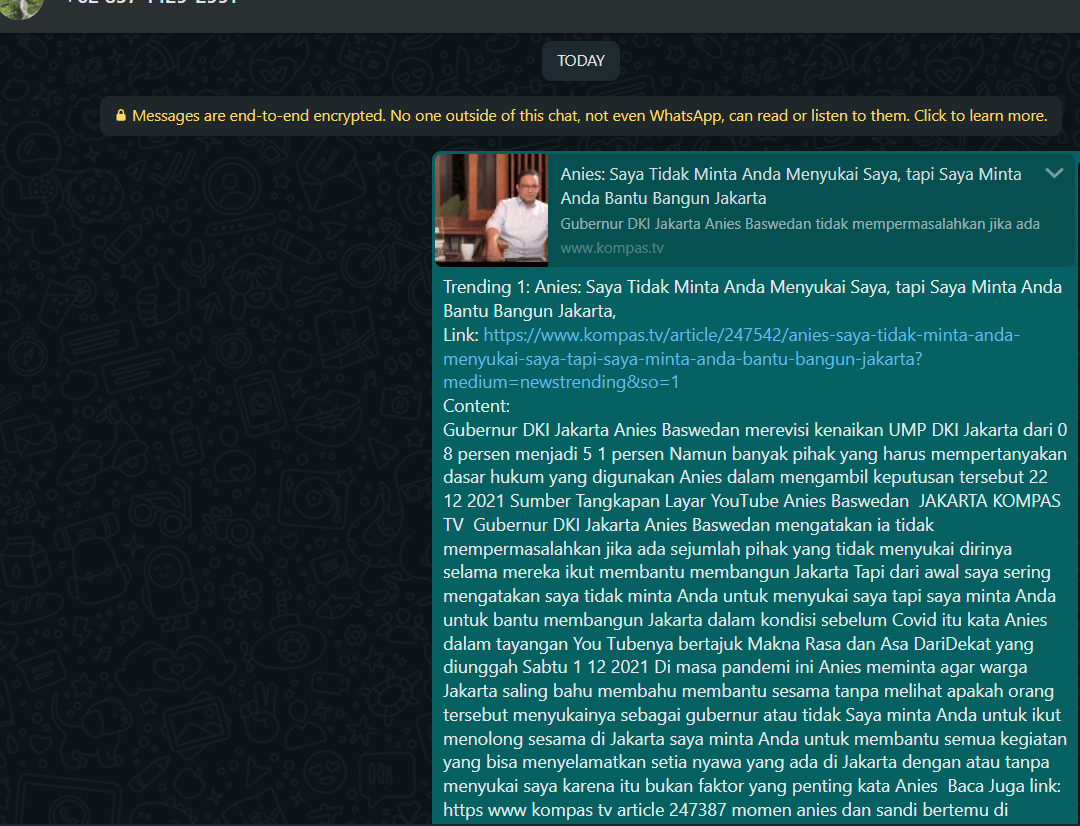